In [1]:
import numpy as np
from scipy import optimize as op
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from fp_plotting_funcs import *
from mcmc_functions import *


# from bts_phot import calibrate_fps

plt.rc('xtick', top=True, direction='in', labelsize=12)
plt.rc('ytick', right=True, direction='in', labelsize=12)
# plt.rc('font', family='Arial')

In [2]:
# READING IN THE FORCED PHOTOMETRY DATA
snztf18 = read_in_data('./data/forced_phot_data/ZTF18aalrxas_fp_lc.txt', data_source='ztf_fp')
sn19rwd = read_in_data('./data/forced_phot_data/19rwd_fp_lc.txt', data_source='ztf_fp')
sn20bio = read_in_data('./data/forced_phot_data/20bio_fp_lc.txt', data_source='ztf_fp')
sn20ano = read_in_data('./data/forced_phot_data/20ano_fp_lc.txt', data_source='ztf_fp')
sn20ikq = read_in_data('./data/forced_phot_data/20ikq_fp_lc.txt', data_source='ztf_fp')
sn20rsc = read_in_data('./data/forced_phot_data/20rsc_fp_lc.txt', data_source='ztf_fp')
sn21aezx = read_in_data('./data/forced_phot_data/21aezx_fp_lc.txt', data_source='ztf_fp')
sn21gno = read_in_data('./data/forced_phot_data/21gno_fp_lc.txt', data_source='ztf_fp')
sn21heh = read_in_data('./data/forced_phot_data/21heh_fp_lc.txt', data_source='ztf_fp')
sn21vgn = read_in_data('./data/forced_phot_data/21vgn_fp_lc.txt', data_source='ztf_fp')
sn22hnt = read_in_data('./data/forced_phot_data/22hnt_fp_lc.txt', data_source='ztf_fp')
sn22jpx = read_in_data('./data/forced_phot_data/22jpx_fp_lc.txt', data_source='ztf_fp')
sn22qzr = read_in_data('./data/forced_phot_data/22qzr_fp_lc.txt', data_source='ztf_fp')

snztf18.columns

/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/User

Index(['field', 'ccdid', 'qid', 'filter', 'pid', 'infobitssci', 'sciinpseeing',
       'scibckgnd', 'scisigpix', 'zpmaginpsci', 'zpmaginpsciunc',
       'zpmaginpscirms', 'clrcoeff', 'clrcoeffunc', 'ncalmatches', 'exptime',
       'adpctdif1', 'adpctdif2', 'diffmaglim', 'zpdiff', 'programid', 'jd',
       'rfid', 'forcediffimflux', 'forcediffimfluxunc', 'forcediffimsnr',
       'forcediffimchisq', 'forcediffimfluxap', 'forcediffimfluxuncap',
       'forcediffimsnrap', 'aperturecorr', 'dnearestrefsrc', 'nearestrefmag',
       'nearestrefmagunc', 'nearestrefchi', 'nearestrefsharp', 'refjdstart',
       'refjdend', 'procstatus', 'mag', 'mag_err_lower', 'mag_err_upper'],
      dtype='object')

In [3]:
#READING IN THE ALERCE ALERT DATA

#DETECTIONS
sn19rwd_a = read_in_data('./data/alerce_data/19rwd/detections.csv', data_source='alerce')
sn21gno_a = read_in_data('./data/alerce_data/21gno/detections.csv', data_source='alerce')
sn21heh_a = read_in_data('./data/alerce_data/21heh/detections.csv', data_source='alerce')
sn21vgn_a = read_in_data('./data/alerce_data/21vgn/detections.csv', data_source='alerce')
sn22hnt_a = read_in_data('./data/alerce_data/22hnt/detections.csv', data_source='alerce')
sn22jpx_a = read_in_data('./data/alerce_data/22jpx/detections.csv', data_source='alerce')

print(sn19rwd_a.columns)

#NON DETECTIONS 
sn19rwd_non = read_in_data('./data/alerce_data/19rwd/non_detections.csv', data_source='alerce')
sn21gno_non = read_in_data('./data/alerce_data/21gno/non_detections.csv', data_source='alerce')
sn21heh_non = read_in_data('./data/alerce_data/21heh/non_detections.csv', data_source='alerce')
sn21vgn_non = read_in_data('./data/alerce_data/21vgn/non_detections.csv', data_source='alerce')
sn22hnt_non = read_in_data('./data/alerce_data/22hnt/non_detections.csv', data_source='alerce')
sn22jpx_non = read_in_data('./data/alerce_data/22jpx/non_detections.csv', data_source='alerce')

print(sn19rwd_non.columns)

Index(['jd', 'tid', 'mjd', 'candid', 'fid', 'pid', 'diffmaglim', 'isdiffpos',
       'nid', 'distnr', 'magpsf', 'magpsf_corr', 'magpsf_corr_ext', 'magap',
       'magap_corr', 'sigmapsf', 'sigmapsf_corr', 'sigmapsf_corr_ext',
       'sigmagap', 'sigmagap_corr', 'ra', 'dec', 'rb', 'rbversion', 'drb',
       'magapbig', 'sigmagapbig', 'rfid', 'has_stamp', 'corrected', 'dubious',
       'candid_alert', 'step_id_corr', 'phase', 'parent_candid'],
      dtype='object')
Index(['jd', 'tid', 'mjd', 'fid', 'diffmaglim'], dtype='object')


In [4]:
# READING IN THE ASAS-SN DATA
snztf18_as = read_in_data('./data/forced_phot_data/snztf18_asassn.csv', data_source='asassn')
sn19rwd_as = read_in_data('./data/forced_phot_data/sn19rwd_asassn.csv', data_source='asassn')
sn20bio_as = read_in_data('./data/forced_phot_data/sn20bio_asassn.csv', data_source='asassn')
sn20ano_as = read_in_data('./data/forced_phot_data/sn20ano_asassn.csv', data_source='asassn')
sn20ikq_as = read_in_data('./data/forced_phot_data/sn20ikq_asassn.csv', data_source='asassn')
sn20rsc_as = read_in_data('./data/forced_phot_data/sn20rsc_asassn.csv', data_source='asassn')
sn21aezx_as = read_in_data('./data/forced_phot_data/sn21aezx_asassn.csv', data_source='asassn')
sn21gno_as = read_in_data('./data/forced_phot_data/sn21gno_asassn.csv', data_source='asassn')
sn21heh_as = read_in_data('./data/forced_phot_data/sn21heh_asassn.csv', data_source='asassn')
sn21vgn_as = read_in_data('./data/forced_phot_data/sn21vgn_asassn.csv', data_source='asassn')
sn22hnt_as = read_in_data('./data/forced_phot_data/sn22hnt_asassn.csv', data_source='asassn')
sn22jpx_as = read_in_data('./data/forced_phot_data/sn22jpx_asassn.csv', data_source='asassn')
sn22qzr_as = read_in_data('./data/forced_phot_data/sn22qzr_asassn.csv', data_source='asassn')

sn22qzr_as.columns

Index(['HJD', 'UT Date', 'Camera', 'FWHM', 'Limit', 'mag', 'mag_err',
       'flux(mJy)', 'flux_err', 'Filter'],
      dtype='object')

In [5]:
# READING IN THE ATLAS DATA 
snztf18_at = read_in_data('./data/forced_phot_data/snztf18_atlas.txt', data_source='atlas')
sn19rwd_at = read_in_data('./data/forced_phot_data/sn19rwd_atlas.txt', data_source='atlas')
sn20bio_at = read_in_data('./data/forced_phot_data/sn20bio_atlas.txt', data_source='atlas')
sn20ano_at = read_in_data('./data/forced_phot_data/sn20ano_atlas.txt', data_source='atlas')
sn20ikq_at = read_in_data('./data/forced_phot_data/sn20ikq_atlas.txt', data_source='atlas')
sn20rsc_at = read_in_data('./data/forced_phot_data/sn20rsc_atlas.txt', data_source='atlas')
sn21aezx_at = read_in_data('./data/forced_phot_data/sn21aezx_atlas.txt', data_source='atlas')
sn21gno_at = read_in_data('./data/forced_phot_data/sn21gno_atlas.txt', data_source='atlas')
sn21heh_at = read_in_data('./data/forced_phot_data/sn21heh_atlas.txt', data_source='atlas')
sn21vgn_at = read_in_data('./data/forced_phot_data/sn21vgn_atlas.txt', data_source='atlas')
sn22hnt_at = read_in_data('./data/forced_phot_data/sn22hnt_atlas.txt', data_source='atlas')
sn22jpx_at = read_in_data('./data/forced_phot_data/sn22jpx_atlas.txt', data_source='atlas')
sn22qzr_at = read_in_data('./data/forced_phot_data/sn22qzr_atlas.txt', data_source='atlas')

sn22qzr_at.columns

Index(['JD', 'MJD', 'm', 'dm', 'uJy', 'duJy', 'F', 'err', 'chi/N', 'RA', 'Dec',
       'x', 'y', 'maj', 'min', 'phi', 'apfit', 'mag5sig', 'Sky', 'Obs'],
      dtype='object')

In [6]:
fp_list = [snztf18, sn19rwd, sn20bio, sn20ano, sn20ikq, sn20rsc, sn21aezx, sn21gno, sn21heh, sn21vgn, sn22hnt, sn22jpx, sn22qzr]
at_list = [snztf18_at, sn19rwd_at, sn20bio_at, sn20ano_at, sn20ikq_at, sn20rsc_at, sn21aezx_at, sn21gno_at, sn21heh_at, sn21vgn_at, sn22hnt_at, sn22jpx_at, sn22qzr_at]
as_list = [snztf18_as, sn19rwd_as, sn20bio_as, sn20ano_as, sn20ikq_as, sn20rsc_as, sn21aezx_as, sn21gno_as, sn21heh_as, sn21vgn_as, sn22hnt_as, sn22jpx_as, sn22qzr_as]

In [7]:
# def slice_flux_df(df,xlims=[0,0]):
#     low,high = xlims[0],xlims[1]
#     return df[(low<=df['jd']) & (df['jd']<=high)].reset_index(drop=True)

# slice_snztf18 = slice_flux_df(snztf18, [13+2.4582e6, 60+2.4582e6])
# slice_sn19rwd = slice_flux_df(sn19rwd, [750+2.458e6, 810+2.458e6])
# slice_sn21vgn = slice_flux_df(sn21vgn, [25+2.4594e6, 75+2.4594e6])

# slice_snztf18.to_csv('./forced_phot_data/subselected_dfs/snztf18_flux.csv',index=False)
# slice_sn19rwd.to_csv('./forced_phot_data/subselected_dfs/sn19rwd_flux.csv',index=False)
# slice_sn21vgn.to_csv('./forced_phot_data/subselected_dfs/sn21vgn_flux.csv',index=False)

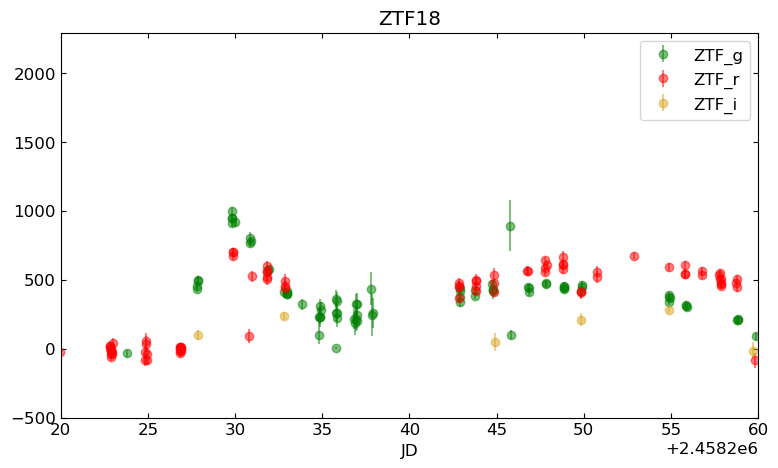

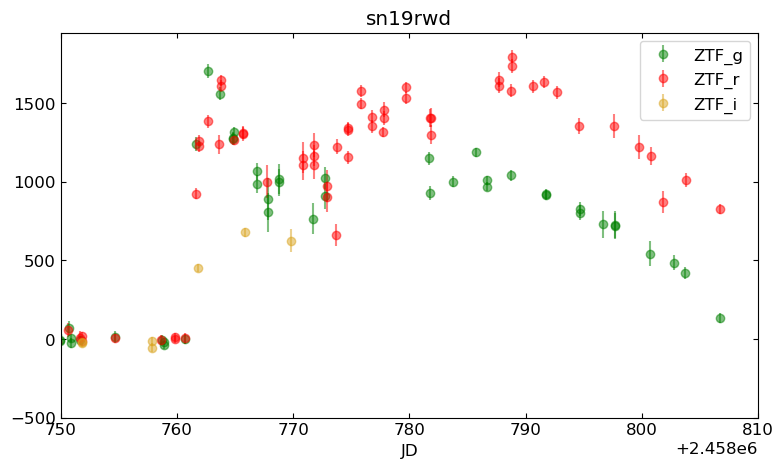

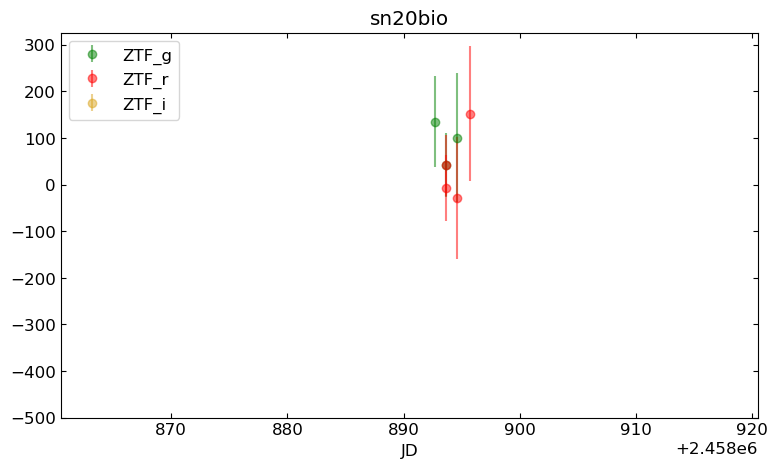

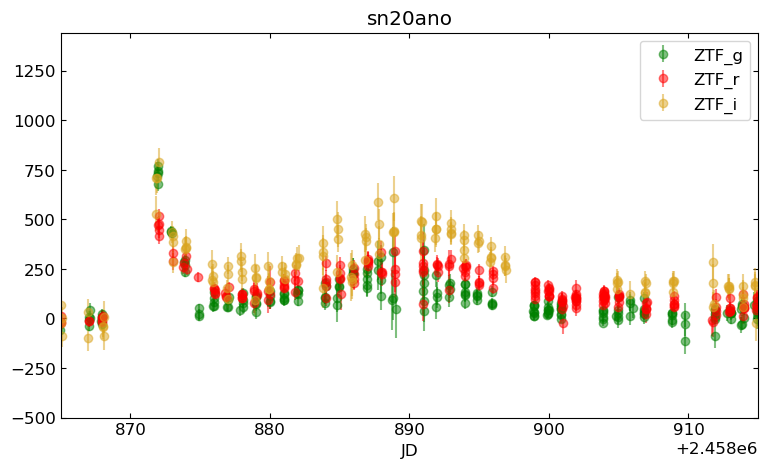

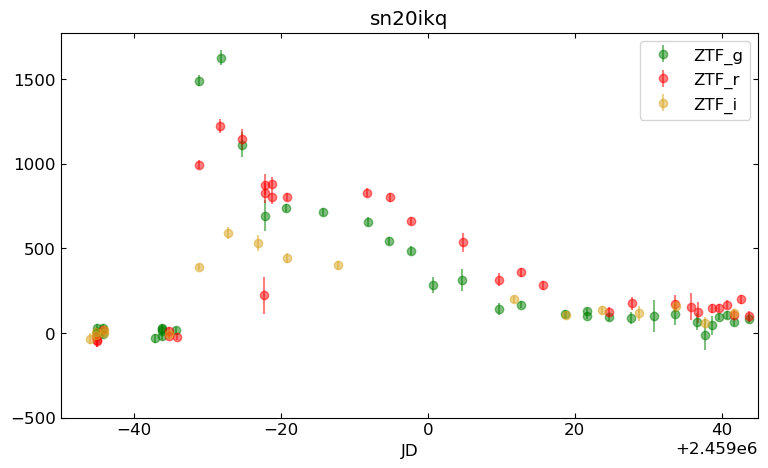

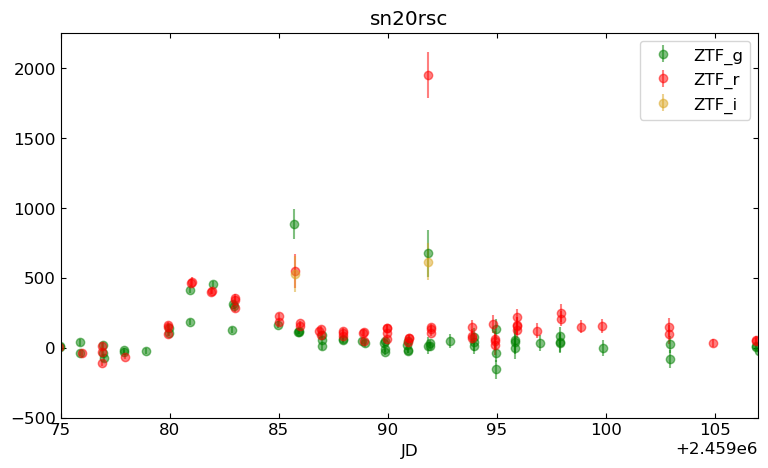

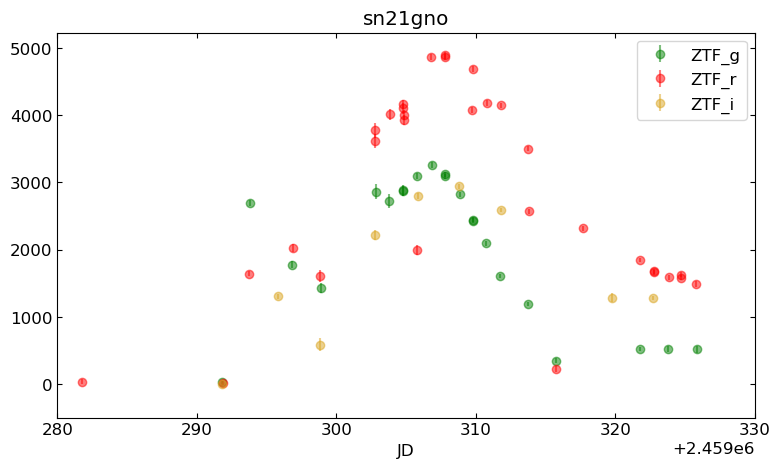

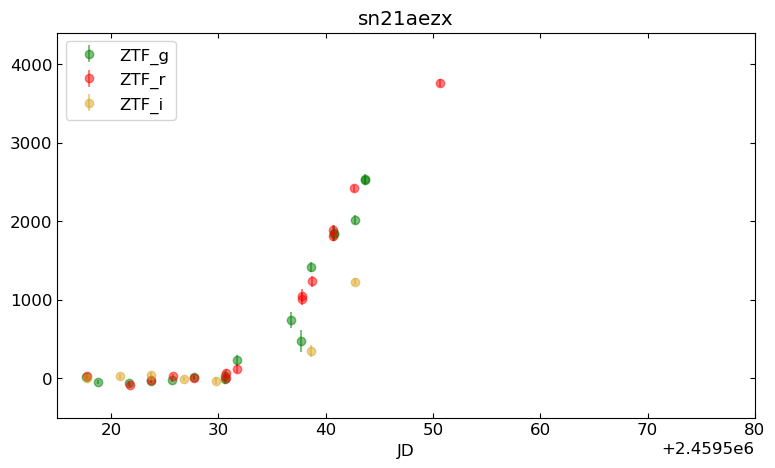

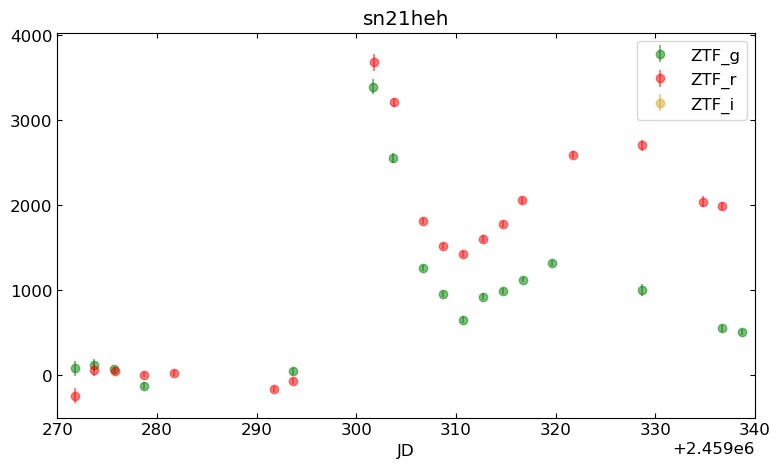

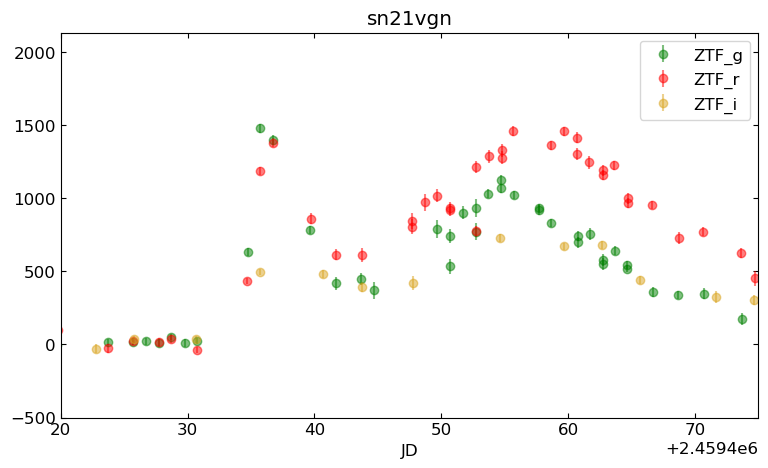

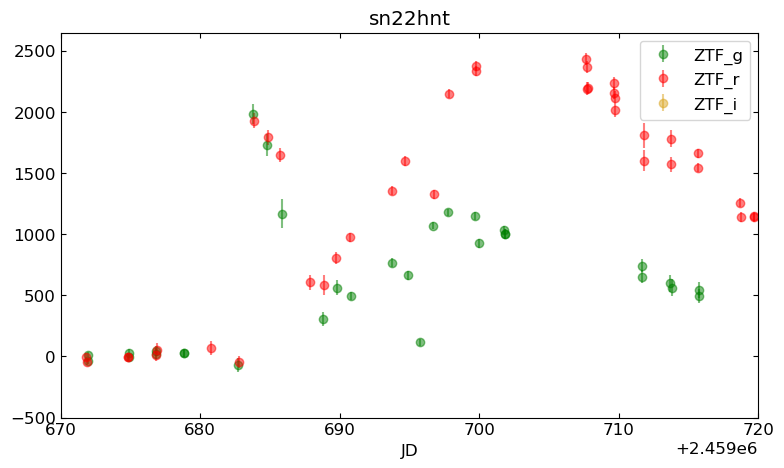

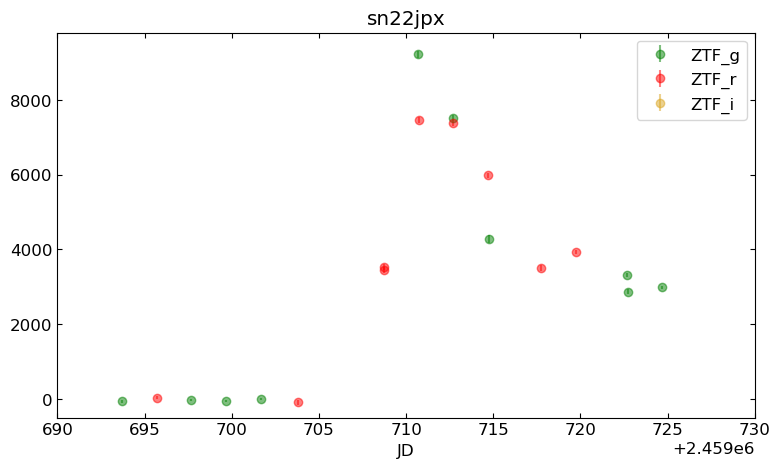

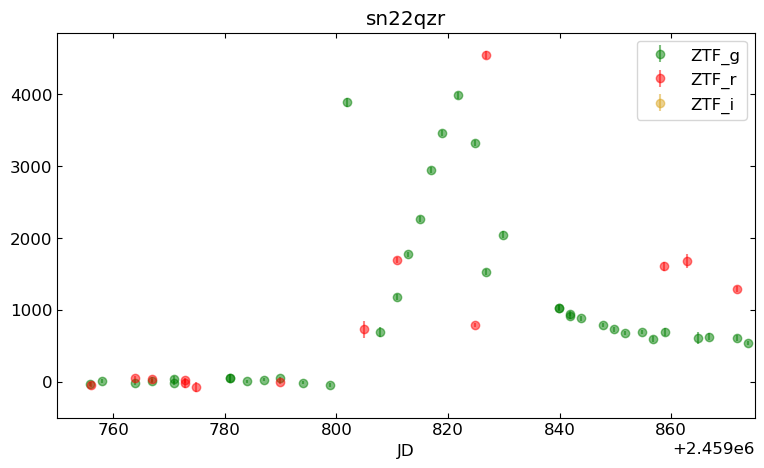

In [8]:
# PLOTTING THE FLUX
# %matplotlib qt
%matplotlib inline

#plotting the fluxes
plot_LC(snztf18, col1='forcediffimflux', err='forcediffimfluxunc',ID='ZTF18', xlimit=True, xlims=[20+2.4582e6, 60+2.4582e6])
plot_LC(sn19rwd, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn19rwd', xlimit=True, xlims=[750+2.458e6, 810+2.458e6])
plot_LC(sn20bio, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn20bio', xlimit=True, xlims=[2458860.5, 2458920.5])
plot_LC(sn20ano, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn20ano', xlimit=True, xlims=[865+2.458e6, 915+2.458e6])
plot_LC(sn20ikq, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn20ikq', xlimit=True, xlims=[-50+2.459e6, 45+2.459e6])
plot_LC(sn20rsc, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn20rsc', xlimit=True, xlims=[75+2.459e6, 107+2.459e6])
plot_LC(sn21gno, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21gno', xlimit=True, xlims=[280+2.459e6, 330+2.459e6])
plot_LC(sn21aezx, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21aezx', xlimit=True, xlims=[15+2.4595e6, 80+2.4595e6])
plot_LC(sn21heh, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21heh', xlimit=True, xlims=[270+2.459e6, 340+2.459e6])
plot_LC(sn21vgn, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21vgn', xlimit=True, xlims=[20+2.4594e6,75+2.4594e6])
plot_LC(sn22hnt, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn22hnt', xlimit=True, xlims=[670+2.459e6, 720+2.459e6])
plot_LC(sn22jpx, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn22jpx', xlimit=True, xlims=[690+2.459e6, 730+2.459e6])
plot_LC(sn22qzr, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn22qzr', xlimit=True, xlims=[750+2.459e6, 875+2.459e6])

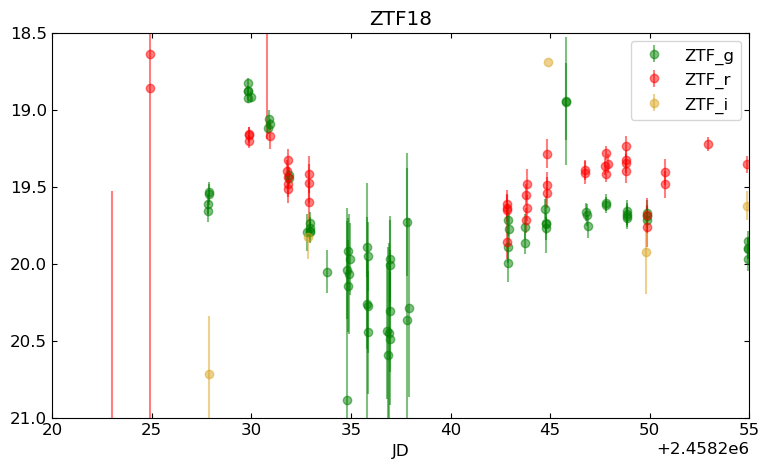

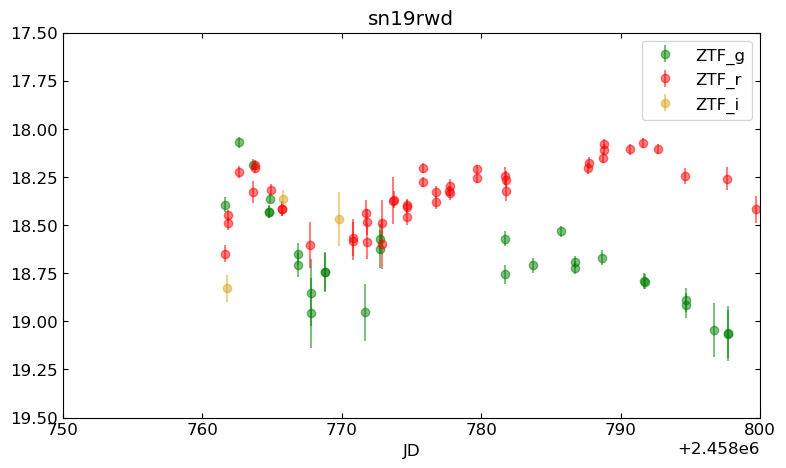

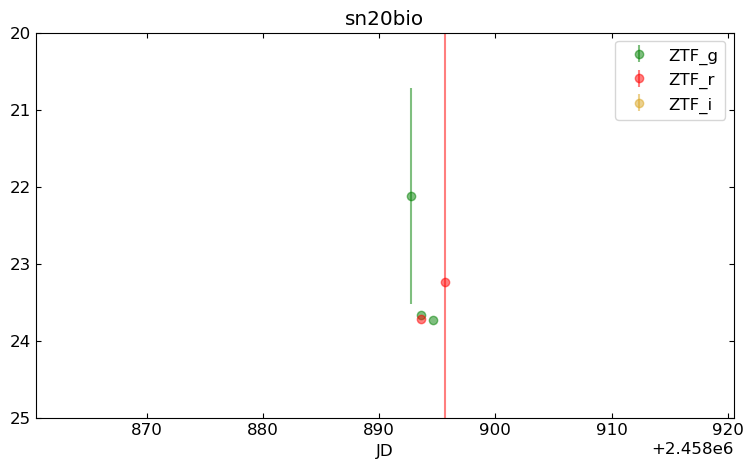

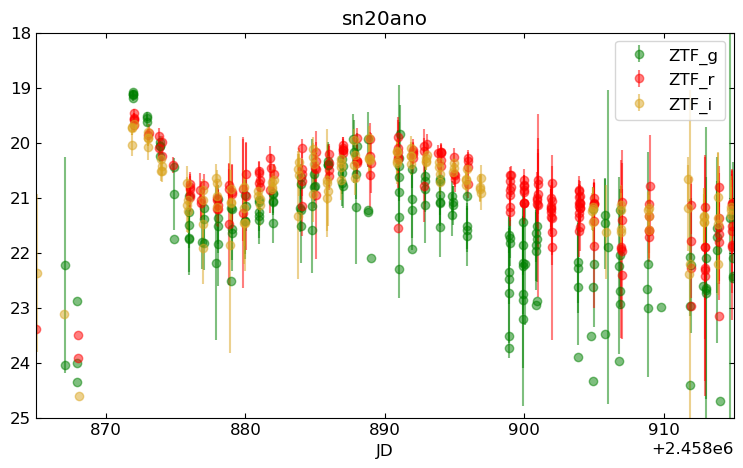

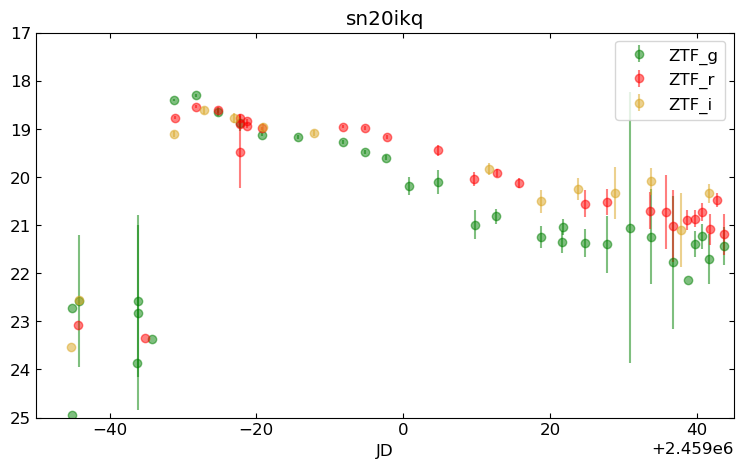

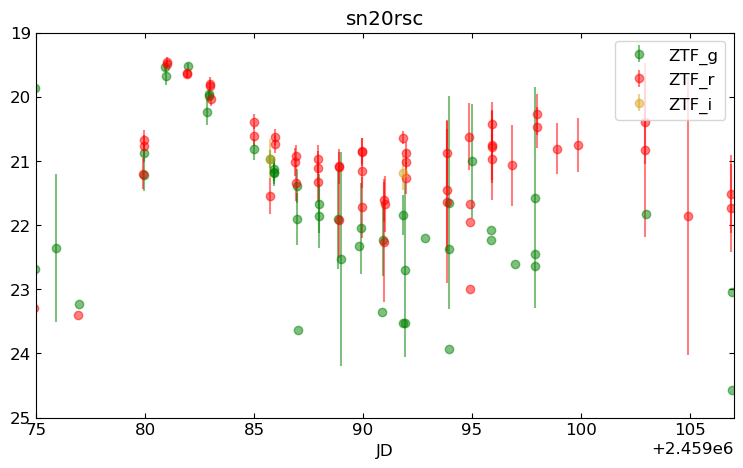

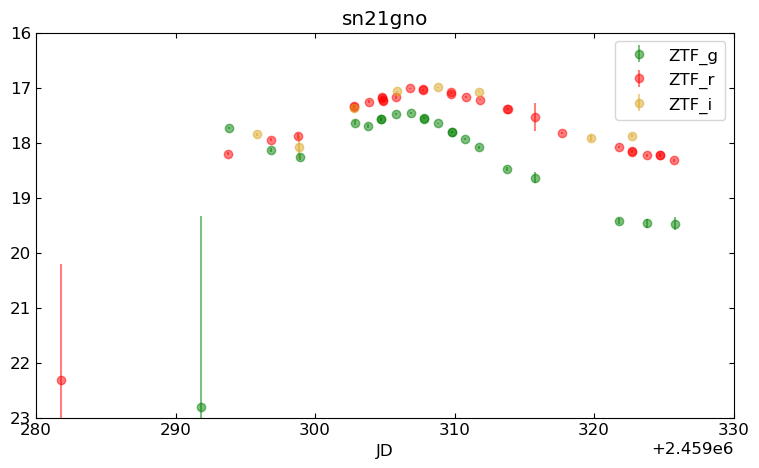

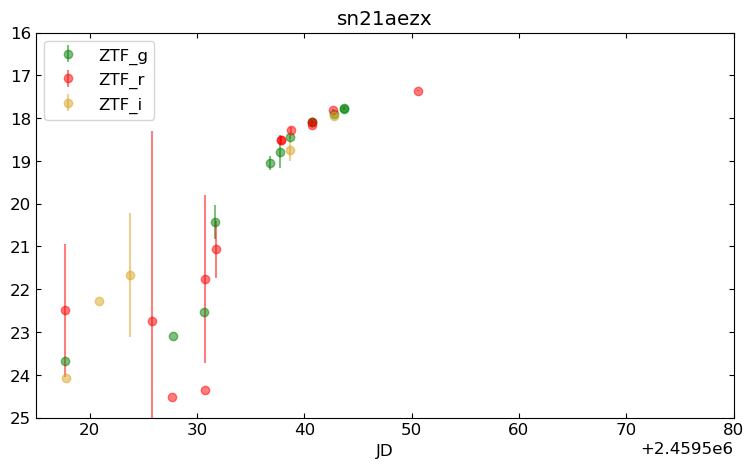

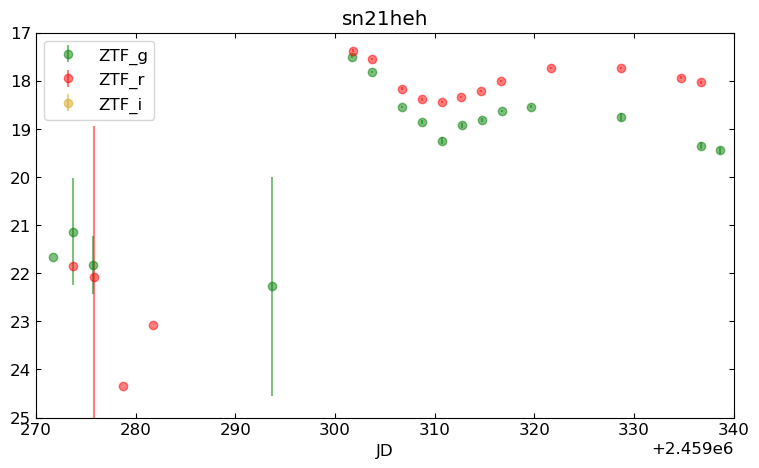

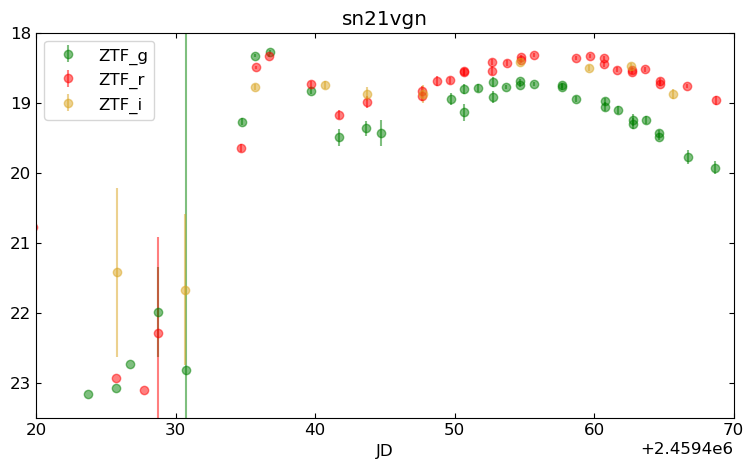

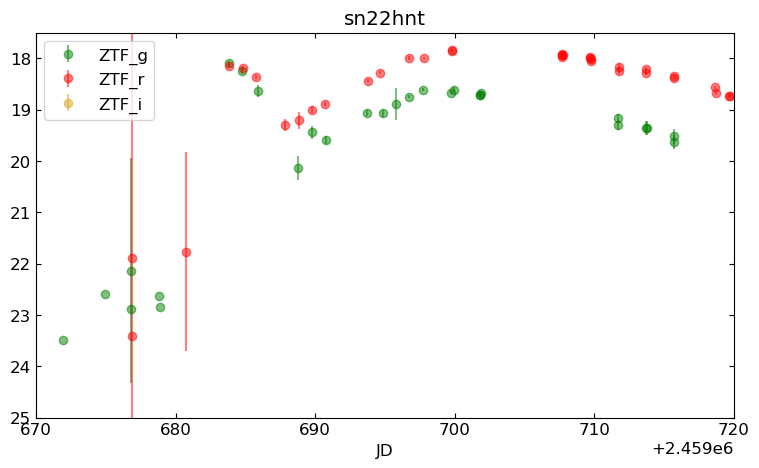

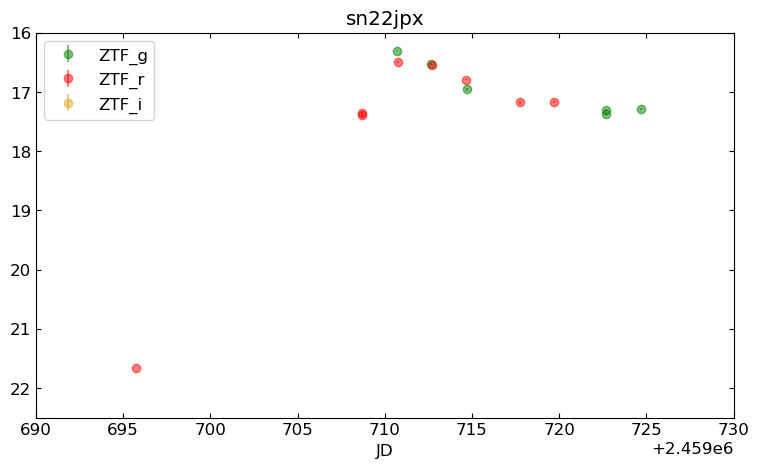

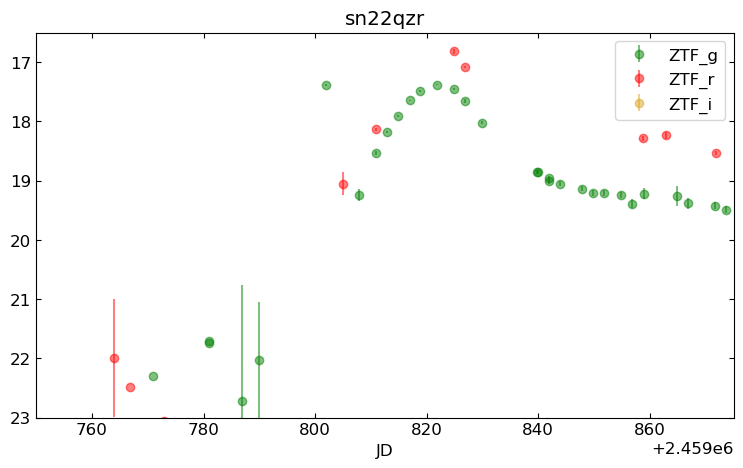

In [9]:
# PLOTTING THE MAG

# %matplotlib qt
%matplotlib inline

## plotting the magnitudes
plot_LC(snztf18, col1='mag', err=_, ID='ZTF18', xlimit=True, xlims=[20+2.4582e6, 55+2.4582e6], ylims=[21.0, 18.5], flux=False)
plot_LC(sn19rwd, col1='mag', err=_,ID='sn19rwd', xlimit=True, xlims=[750+2.458e6, 800+2.458e6], ylims=[19.5, 17.5], flux=False)
plot_LC(sn20bio, col1='mag', err=_,ID='sn20bio', xlimit=True, xlims=[2458860.5, 2458920.5], ylims=[25, 20], flux=False)
plot_LC(sn20ano, col1='mag', err=_,ID='sn20ano', xlimit=True, xlims=[865+2.458e6, 915+2.458e6], ylims=[25,18], flux=False)
plot_LC(sn20ikq, col1='mag', err=_,ID='sn20ikq', xlimit=True, xlims=[-50+2.459e6, 45+2.459e6], ylims=[25,17], flux=False)
plot_LC(sn20rsc, col1='mag', err=_,ID='sn20rsc', xlimit=True, xlims=[75+2.459e6, 107+2.459e6], ylims=[25,19], flux=False)
plot_LC(sn21gno, col1='mag', err=_, ID='sn21gno', xlimit=True, xlims=[280+2.459e6, 330+2.459e6], ylims=[23, 16], flux=False)
plot_LC(sn21aezx, col1='mag', err=_, ID='sn21aezx', xlimit=True, xlims=[15+2.4595e6, 80+2.4595e6], ylims=[25, 16], flux=False)
plot_LC(sn21heh, col1='mag', err=_, ID='sn21heh', xlimit=True, xlims=[270+2.459e6, 340+2.459e6], ylims=[25, 17], flux=False)
plot_LC(sn21vgn, col1='mag', err=_, ID='sn21vgn', xlimit=True, xlims=[20+2.4594e6,70+2.4594e6], ylims=[23.5, 18], flux=False)
plot_LC(sn22hnt, col1='mag', err=_, ID='sn22hnt', xlimit=True, xlims=[670+2.459e6, 720+2.459e6], ylims=[25, 17.5], flux=False)
plot_LC(sn22jpx, col1='mag', err=_, ID='sn22jpx', xlimit=True, xlims=[690+2.459e6, 730+2.459e6], ylims=[22.5, 16.0], flux=False)
plot_LC(sn22qzr, col1='mag', err=_, ID='sn22qzr', xlimit=True, xlims=[750+2.459e6, 875+2.459e6], ylims=[23.0, 16.5], flux=False)

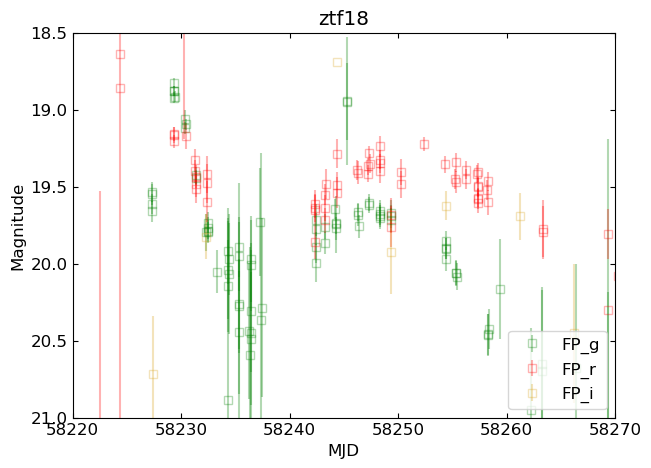

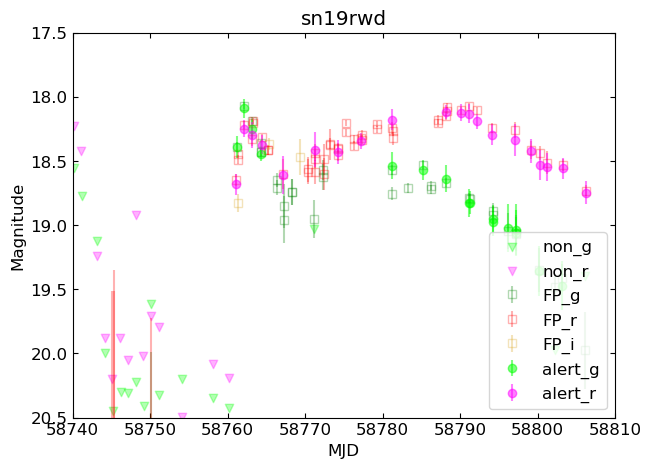

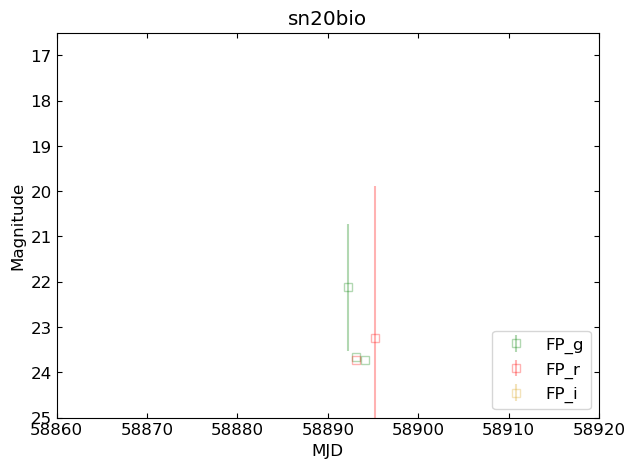

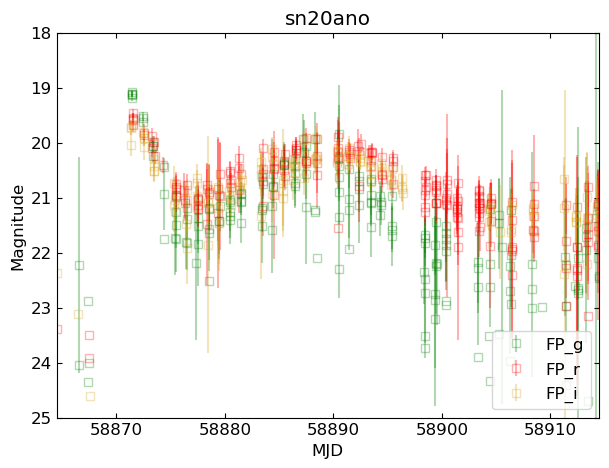

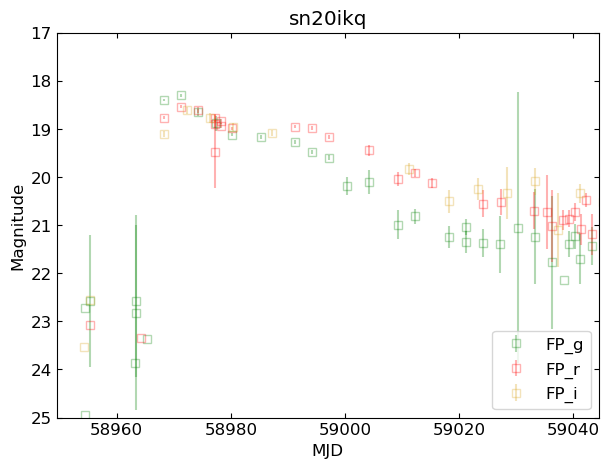

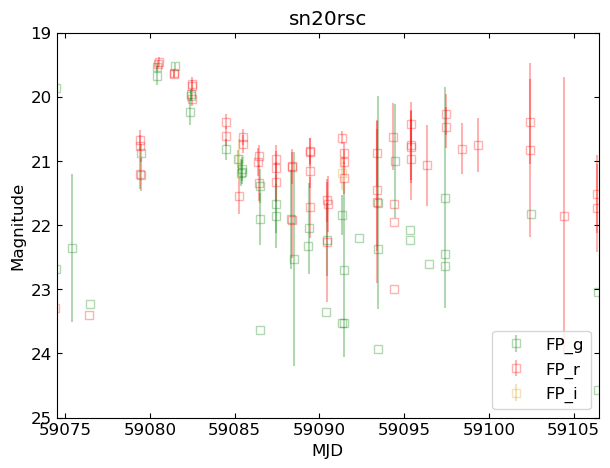

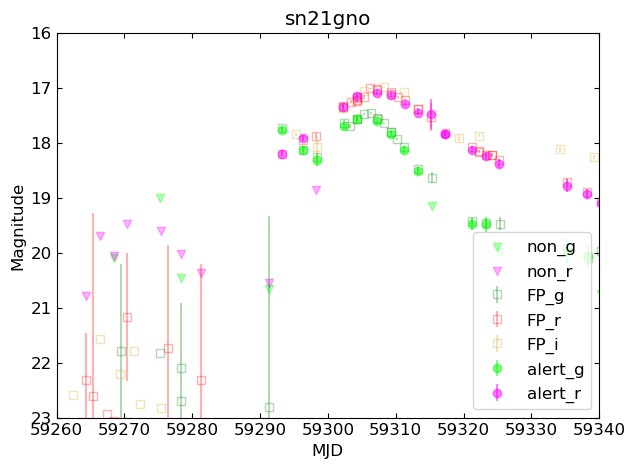

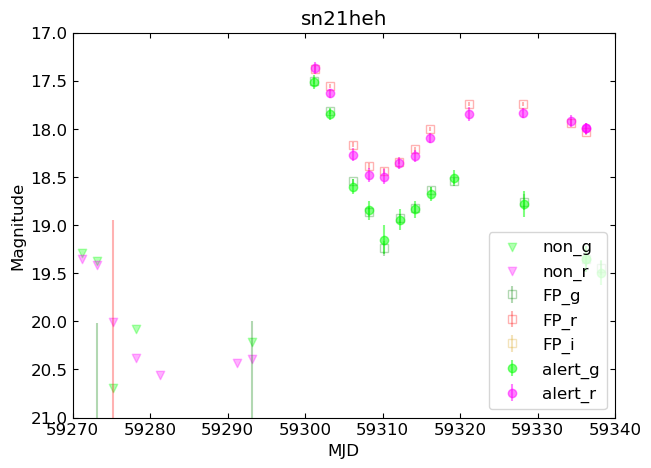

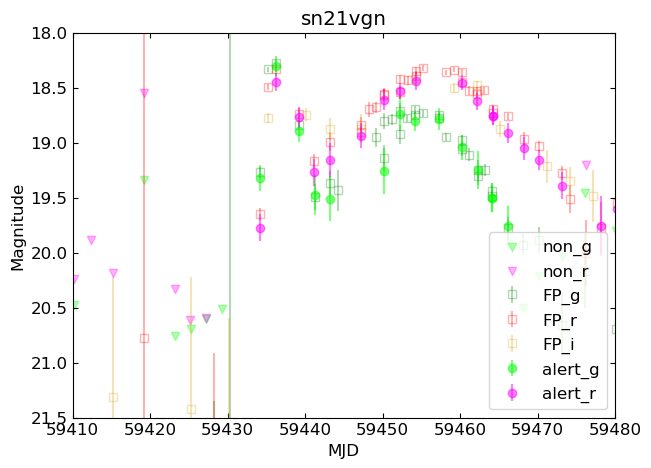

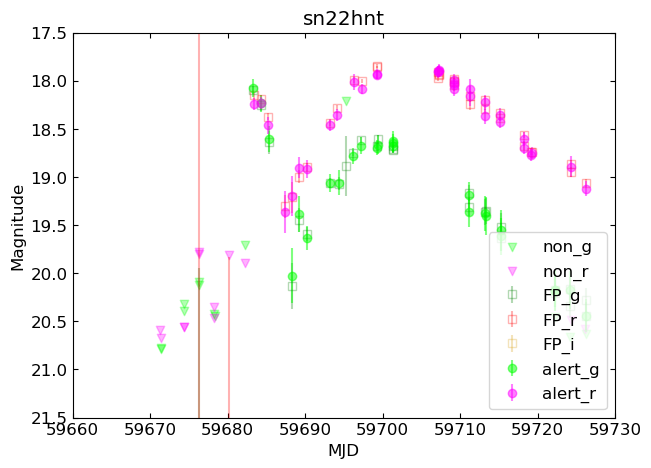

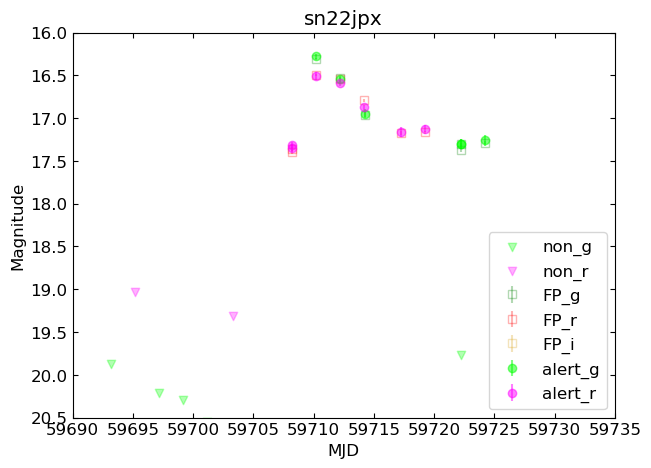

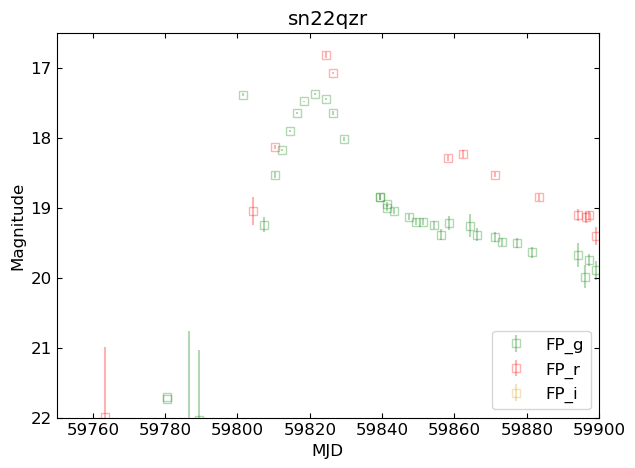

In [10]:
# PLOTTING FP AND ALERT DATA TOGETHER

%matplotlib inline
# %matplotlib qt

plot_fp_mag_LC(snztf18, _, _, ID='ztf18', alert=False, xlims=[58220, 58270], ylims=[21.0, 18.5])
plot_fp_mag_LC(sn19rwd, sn19rwd_a, sn19rwd_non, ID='sn19rwd', xlims=[58740, 58810], ylims=[20.5, 17.5])
plot_fp_mag_LC(sn20bio, _, _, ID='sn20bio', alert=False, xlims=[58860, 58920], ylims=[25.0, 16.5])
plot_fp_mag_LC(sn20ano, _, _,ID='sn20ano', alert=False, xlims=[58864.5, 58914.5], ylims=[25,18])
plot_fp_mag_LC(sn20ikq, _, _,ID='sn20ikq', alert=False, xlims=[58949.5, 59044.5], ylims=[25,17])
plot_fp_mag_LC(sn20rsc, _, _,ID='sn20rsc', alert=False, xlims=[59074.5, 59106.5], ylims=[25,19])
plot_fp_mag_LC(sn21gno, sn21gno_a, sn21gno_non, ID='sn21gno', xlims=[59260, 59340], ylims=[23, 16])
# too messy #plot_fp_mag_LC(sn21aezx,  _, _, ID='sn21aezx', alert=False)#, xlims=[58220, 58270], ylims=[21.0, 18.5])
plot_fp_mag_LC(sn21heh, sn21heh_a, sn21heh_non, ID='sn21heh', xlims=[59270, 59340], ylims=[21, 17])
plot_fp_mag_LC(sn21vgn, sn21vgn_a, sn21vgn_non, ID='sn21vgn', xlims=[59410, 59480], ylims=[21.5, 18])
plot_fp_mag_LC(sn22hnt, sn22hnt_a, sn22hnt_non, ID='sn22hnt', xlims=[59660, 59730], ylims=[21.5, 17.5])
plot_fp_mag_LC(sn22jpx, sn22jpx_a, sn22jpx_non, ID='sn22jpx', xlims=[59690, 59735], ylims=[20.5, 16.0])
plot_fp_mag_LC(sn22qzr, _, _, ID='sn22qzr', alert=False, xlims=[59750, 59900], ylims=[22.0, 16.5])

In [11]:
# def side_by_side(fp, ald, nond, ID='temp', alert=True, xlims_mjd=[0,0], xlims_jd=[0,0], ylims=[0,0], save=True):
#     plt.figure(figsize=(12,8))

#     plt.subplot(2, 1, 1)
#     #combined, t=[mjd]
#     plot_combo_LC(fp, ald, nond, ID=ID, alert=alert, xlims=[xlims_mjd[0], xlims_mjd[1]], ylims=[ylims[0], ylims[1]], new_fig=False, show=False, save=False)
        

#     plt.subplot(2, 2, 3)
#     #flux, t=[jd]
#     plot_LC(fp, col1='forcediffimflux', err='forcediffimfluxunc',ID=ID, xlimit=True, xlims=[xlims_jd[0], xlims_jd[1]], new_fig=False, save=False, show=False)
#     plt.ylabel('Flux')
#     plt.title(None)


#     plt.subplot(2, 2, 4)
#     #magnitude, t=[jd]
#     plot_LC(fp, col1='mag', err=_, ID=ID, xlimit=True, xlims=[xlims_jd[0], xlims_jd[1]], ylims=[ylims[0], ylims[1]], flux=False, new_fig=False, save=False, show=False)
#     plt.ylabel('Mag')
#     plt.title(None)

#     plt.tight_layout()
#     if save:
#         plt.savefig('./figures/fp/'+ID+'_sidebysidebyside.png')

In [12]:
#fp_list = [snztf18, sn19rwd, sn20bio, sn21aezx, sn21gno, sn21heh, sn21vgn, sn22hnt, sn22jpx, sn22qzr]
al_list = [_, sn19rwd_a, _, _,_,_, _, sn21gno_a, sn21heh_a, sn21vgn_a, sn22hnt_a, sn22jpx_a, _]
nd_list = [_, sn19rwd_non, _, _,_,_,_, sn21gno_non, sn21heh_non, sn21vgn_non, sn22hnt_non, sn22jpx_non, _]
alert_bools = [False, True, False, False, False, False, False, True, True, True, True, True, False]
ID_list = ['snztf18', 'sn19rwd', 'sn20bio', 'sn20ano', 'sn20ikq', 'sn20rsc',
           'sn21aezx', 'sn21gno', 'sn21heh', 'sn21vgn', 'sn22hnt', 'sn22jpx', 'sn22qzr']
xlims_mjd_ls = [[58220, 58270], [58740, 58810], [58860, 58920], [58864.5, 58914.5], [58949.5, 59044.5], [59074.5, 59106.5],
                [59514.5, 59569.5], [59279.5, 59319.5], [59270, 59340], [59410, 59480], [59660, 59730], [59690, 59735], [59750, 59900]]
xlims_jd_ls = [[20+2.4582e6, 55+2.4582e6], [755+2.458e6, 800+2.458e6], [2458860.5, 2458920.5], [865+2.458e6, 915+2.458e6], [-45+2.459e6, 20+2.459e6], [75+2.459e6, 107+2.459e6],
               [25+2.4595e6, 70+2.4595e6], [280+2.459e6, 320+2.459e6], [2459270.5, 2459340.5], [2459410.5, 2459480.5], [2459670.5, 2459730.5], [2459700.5, 2459740.5], [780+2.459e6, 875+2.459e6]]
ylims_ls = [[21.0, 18.5], [20.5, 17.5], [27.5, 12.5], [25,18], [25,17], [25,19],
            [23, 16], [24,16], [21, 17], [21.5, 18], [21.5, 17.5], [19.0, 16.0], [22.0, 16.0]]

In [13]:
# for i in range(len(fp_list)):
#     side_by_side(fp_list[i], al_list[i], nd_list[i], ID=ID_list[i], alert=alert_bools[i], xlims_mjd=xlims_mjd_ls[i], xlims_jd=xlims_jd_ls[i], ylims=ylims_ls[i], save=True)

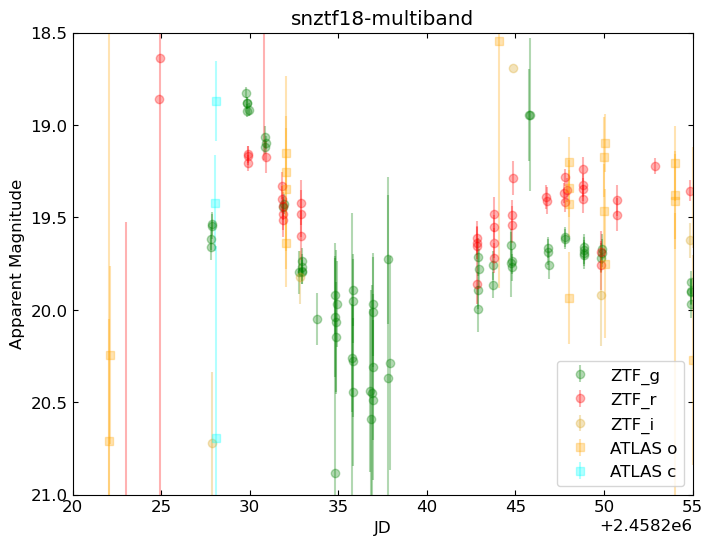

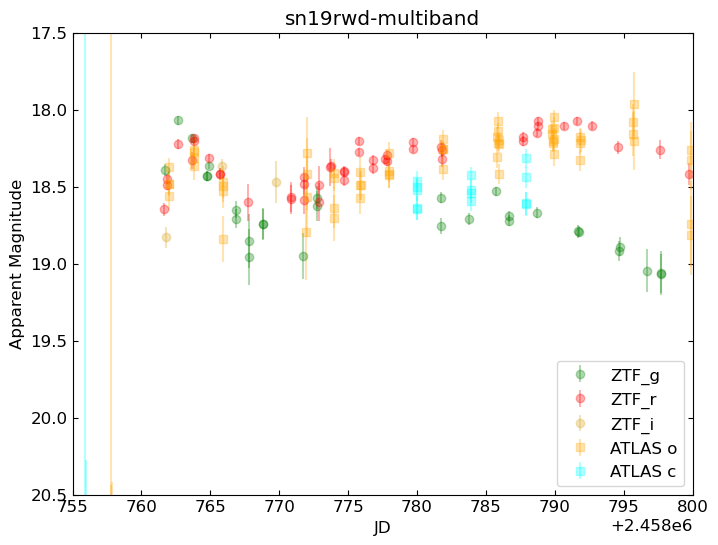

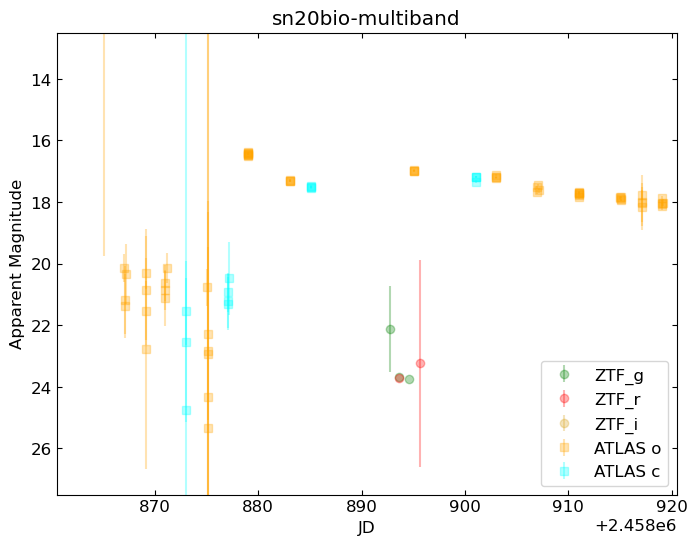

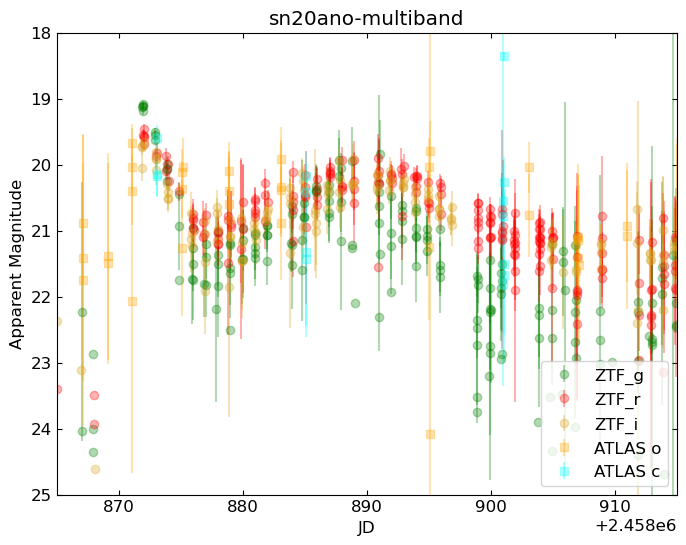

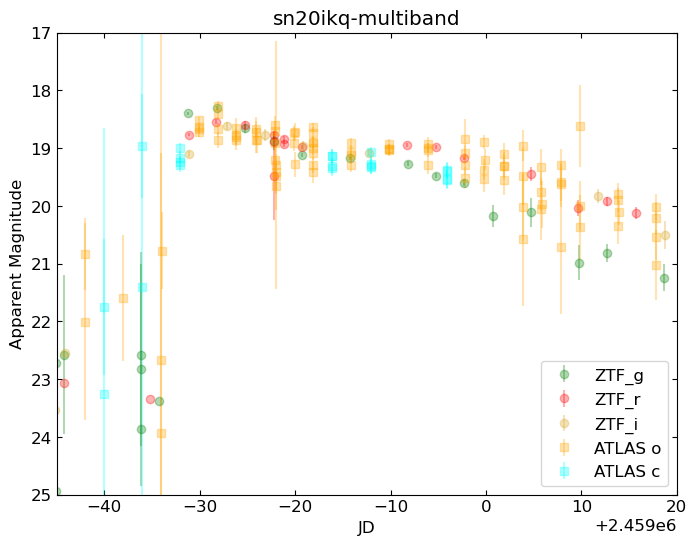

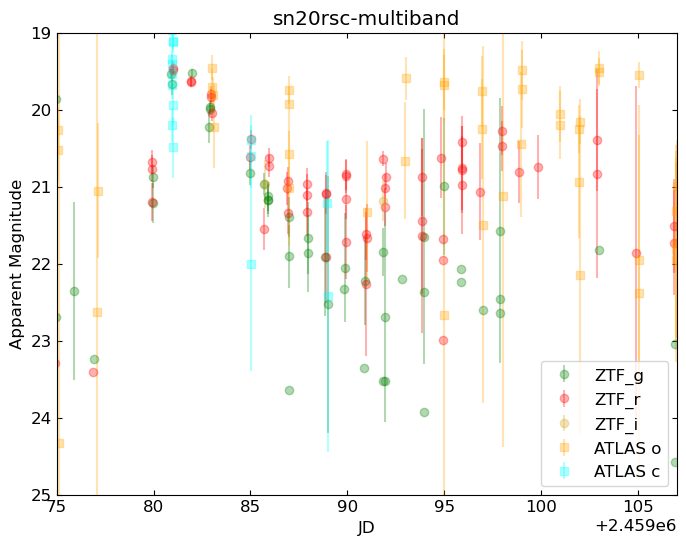

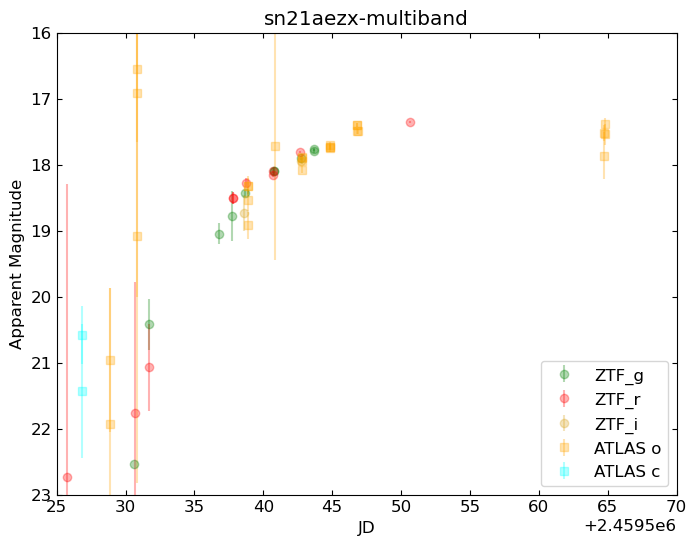

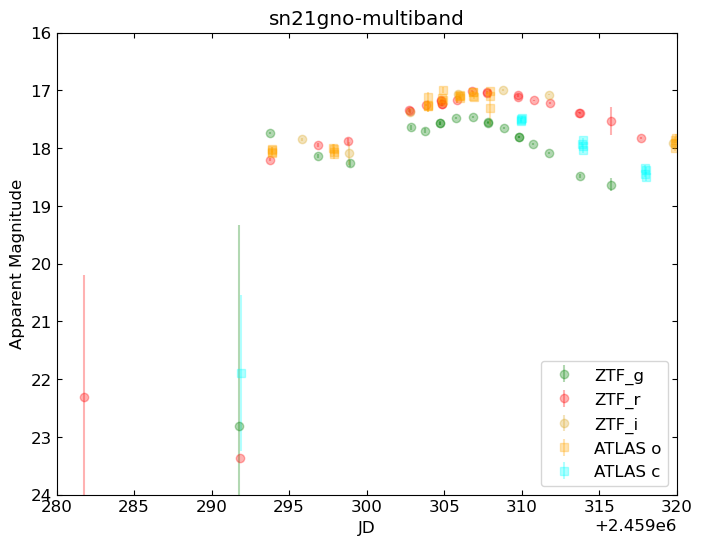

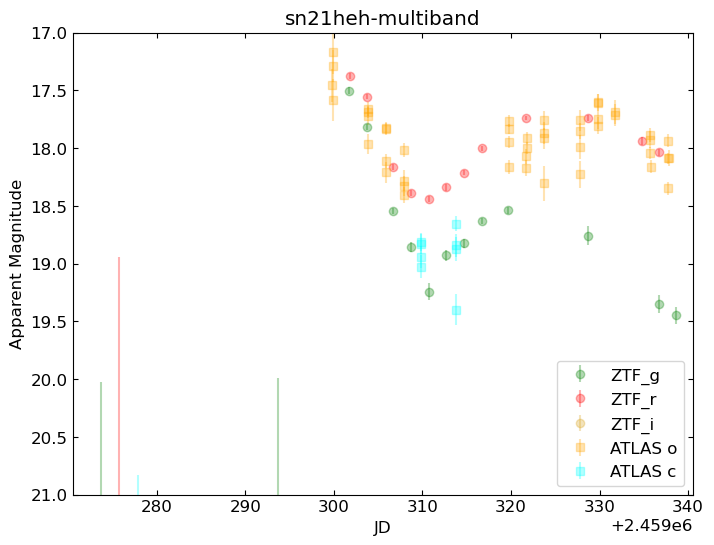

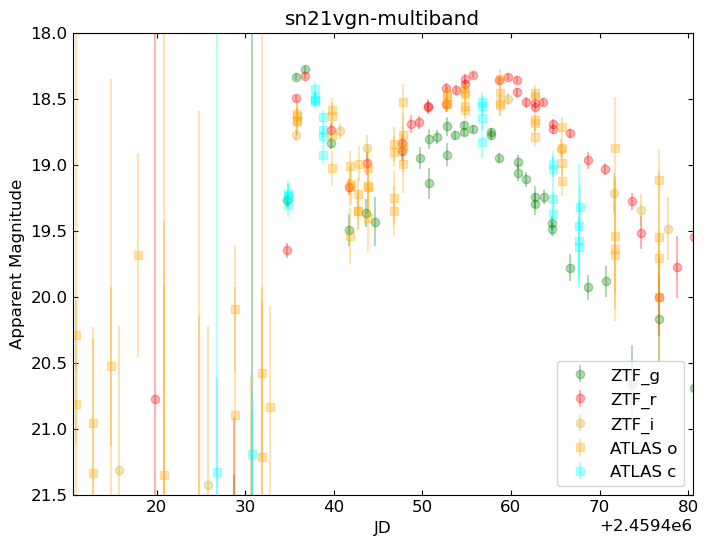

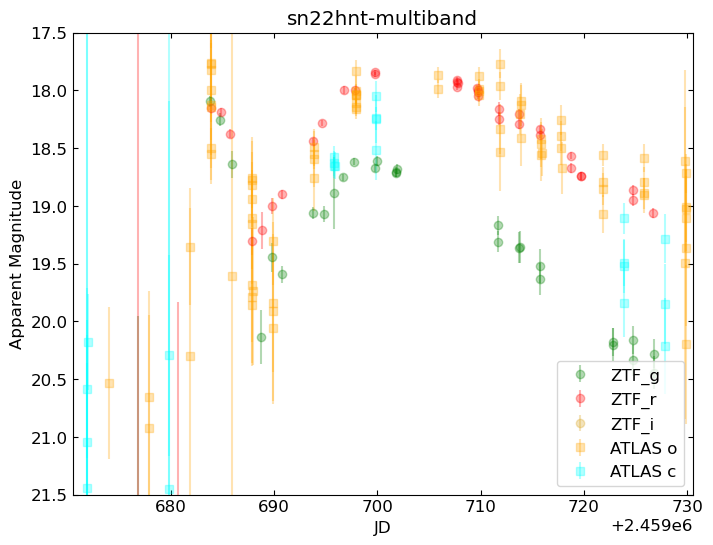

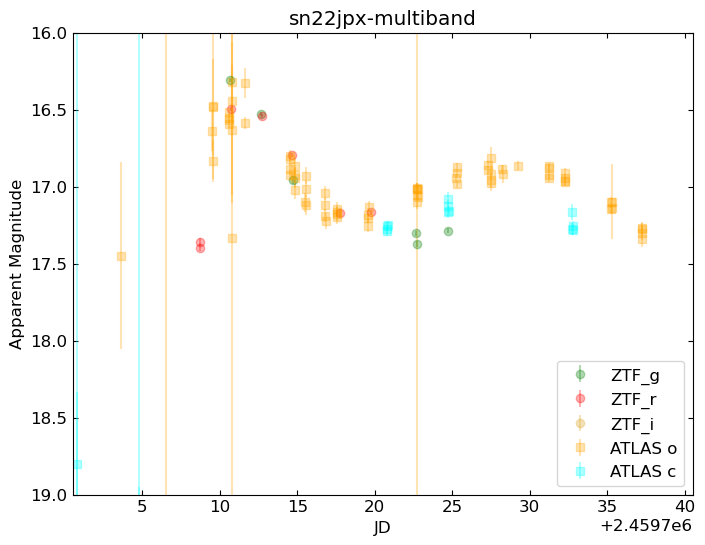

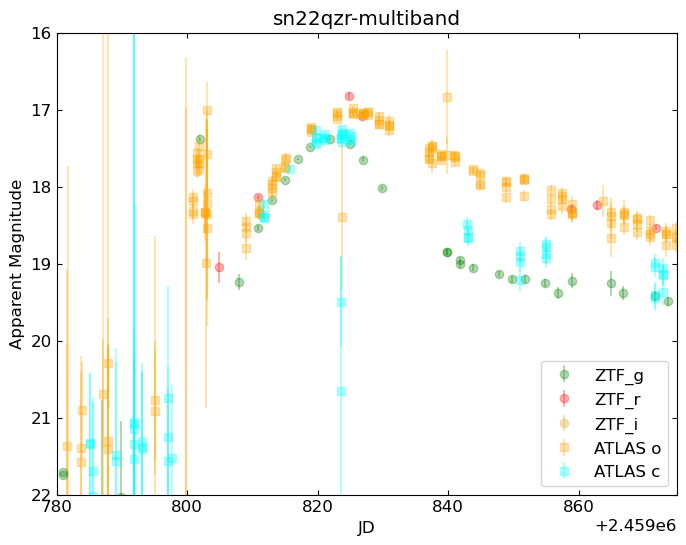

In [14]:
%matplotlib inline
# %matplotlib qt
for i in range(len(fp_list)):
    multi_band_plot(fp_list[i], as_list[i], at_list[i], ID=ID_list[i], xlims=xlims_jd_ls[i], ylims=ylims_ls[i],save=False, ztf=True, atlas=True, asassn=False)

/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


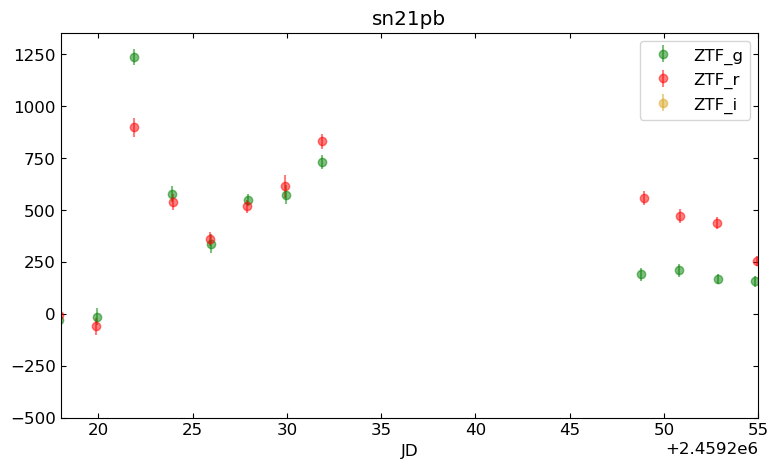

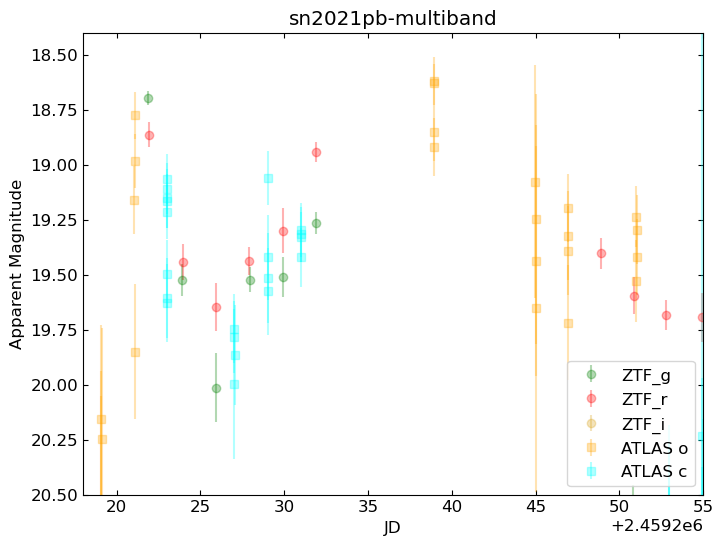

In [15]:
sn21pb = read_in_data('./data/forced_phot_data/21pb_fp_lc.txt', data_source='ztf_fp')
sn21pb_at = read_in_data('./data/forced_phot_data/sn2021pb_atlas.txt', data_source='atlas')
plot_LC(sn21pb, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21pb', xlimit=True, xlims=[18+2.4592e6, 55+2.4592e6])
multi_band_plot(sn21pb, _, sn21pb_at, ID='sn2021pb', xlims=[18+2.4592e6, 55+2.4592e6], ylims=[20.5,18.4],save=False, atlas=True, asassn=False)
# fp_df = sn21pb
# atlas_df = sn21pb_at

times = np.concatenate((np.array(sn21pb['jd']),np.array(sn21pb_at['JD'])),axis=None)
filters = np.concatenate((np.array(sn21pb['filter']),np.array(sn21pb_at['F'])),axis=None)
mags = np.concatenate((np.array(sn21pb['mag']),np.array(sn21pb_at['m'])),axis=None)
origins = np.concatenate((np.array(['ztf']*len(sn21pb['jd'])),np.array(['atlas']*len(sn21pb_at['JD']))),axis=None)

# ztf_atlas_df = pd.DataFrame(columns=['JD', 'filter', 'mag', 'ztf_mag_lower', 'ztf_mag_upper', 'atlas_mag_err', 'data_origin'])

# ztf_atlas_df['JD'],ztf_atlas_df['filter'],ztf_atlas_df['mag'],ztf_atlas_df['data_origin'] = times,filters,mags,origins
# ztf_atlas_df['ztf_mag_lower'][ztf_atlas_df['data_origin']=='ztf'] = np.array(sn21pb['mag_err_lower'])
# ztf_atlas_df['ztf_mag_upper'][ztf_atlas_df['data_origin']=='ztf'] = np.array(sn21pb['mag_err_upper'])
# ztf_atlas_df['atlas_mag_err'][ztf_atlas_df['data_origin']=='atlas'] = np.array(atlas_df['dm'])

# ztf_atlas_df

# ztf_atlas_df.to_csv('./data/forced_phot_data/sn21pb_ztf_atlas_df.csv',index_label='index')

In [25]:
#dropping bad obs
def drop_bad_obs(at_df, ztf_df, save=False, sn_str=''):
#atlas 
    clean_at = at_df[(at_df['chi/N'] < 4.0)].reset_index(drop=True)
    print('atlas: removed',len(at_df.index)-len(clean_at.index), 'bad obs')
    #ztf
    clean_ztf = ztf_df[(ztf_df['infobitssci'] < 33554432) & (ztf_df['scisigpix'] <= 25) & (ztf_df['sciinpseeing'] <= 4)].reset_index(drop=True)
    print('ztf: removed',len(ztf_df.index)-len(clean_ztf.index), 'bad obs')
    if save:
        export_combined_df(clean_ztf, clean_at, SN_ID=sn_str)
        return
    else:
        return clean_at, clean_ztf

In [26]:
df_str_list = ['snztf18','sn19rwd','sn20ano','sn20bio','sn20ikq','sn20rsc','sn21gno','sn21heh','sn21pb', 'sn21vgn','sn22hnt','sn22jpx','sn22qzr']
ztf_df_list = [snztf18,sn19rwd,sn20ano,sn20bio,sn20ikq,sn20rsc,sn21gno,sn21heh,sn21pb, sn21vgn,sn22hnt,sn22jpx,sn22qzr]
at_df_list = [snztf18_at,sn19rwd_at,sn20ano_at,sn20bio_at,sn20ikq_at,sn20rsc_at,sn21gno_at,sn21heh_at,sn21pb_at,sn21vgn_at,sn22hnt_at,sn22jpx_at,sn22qzr_at]

In [27]:
for i,sn in enumerate(df_str_list):
    print('on:', sn)
    drop_bad_obs(at_df_list[i], ztf_df_list[i], save=False, sn_str=sn)

on: snztf18
atlas: removed 18 bad obs
ztf: removed 193 bad obs
on: sn19rwd
atlas: removed 9 bad obs
ztf: removed 120 bad obs
on: sn20ano
atlas: removed 131 bad obs
ztf: removed 351 bad obs
on: sn20bio
atlas: removed 6 bad obs
ztf: removed 83 bad obs
on: sn20ikq
atlas: removed 4 bad obs
ztf: removed 95 bad obs
on: sn20rsc
atlas: removed 150 bad obs
ztf: removed 101 bad obs
on: sn21gno
atlas: removed 4 bad obs
ztf: removed 125 bad obs
on: sn21heh
atlas: removed 146 bad obs
ztf: removed 86 bad obs
on: sn21pb
atlas: removed 1 bad obs
ztf: removed 30 bad obs
on: sn21vgn
atlas: removed 9 bad obs
ztf: removed 221 bad obs
on: sn22hnt
atlas: removed 12 bad obs
ztf: removed 346 bad obs
on: sn22jpx
atlas: removed 5 bad obs
ztf: removed 42 bad obs
on: sn22qzr
atlas: removed 9 bad obs
ztf: removed 58 bad obs


In [16]:
# export_combined_df(snztf18, snztf18_at, SN_ID='snztf18')
# export_combined_df(sn19rwd, sn19rwd_at, SN_ID='sn19rwd')
# export_combined_df(sn20bio, sn20bio_at, SN_ID='sn20bio')
# export_combined_df(sn21aezx, sn21aezx_at, SN_ID='sn21aezx')
# export_combined_df(sn21gno, sn21gno_at, SN_ID='sn21gno')
# export_combined_df(sn21heh, sn21heh_at, SN_ID='sn21heh')
# export_combined_df(sn21vgn, sn21vgn_at, SN_ID='sn21vgn')
# export_combined_df(sn22hnt, sn22hnt_at, SN_ID='sn22hnt')
# export_combined_df(sn22jpx, sn22jpx_at, SN_ID='sn22jpx')
# export_combined_df(sn22qzr, sn22qzr_at, SN_ID='sn22qzr')
## added later
export_combined_df(sn20ano, sn20ano_at, SN_ID='sn20ano')
export_combined_df(sn20ikq, sn20ikq_at, SN_ID='sn20ikq')
export_combined_df(sn20rsc, sn20rsc_at, SN_ID='sn20rsc')

/Users/pnr5sh/Library/CloudStorage/OneDrive-Personal/Documents/PhD/ztf_IIb_gh/fp_plotting_funcs.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ztf_atlas_df['ztf_mag_lower'][ztf_atlas_df['data_origin']=='ztf'] = np.array(fp_df['mag_err_lower'])
/Users/pnr5sh/Library/CloudStorage/OneDrive-Personal/Documents/PhD/ztf_IIb_gh/fp_plotting_funcs.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ztf_atlas_df['ztf_mag_upper'][ztf_atlas_df['data_origin']=='ztf'] = np.array(fp_df['mag_err_upper'])
/Users/pnr5sh/Library/CloudStorage/OneDrive-Personal/Documents/PhD/ztf_IIb_gh/fp_plotting_funcs.py:102: SettingWithCopyWarni

In [3]:
#######################################
#           plot for paper
#######################################

In [26]:
# read in the data (df created in fp jupyter notebook)
snztf18 = pd.read_csv('./data/forced_phot_data/snztf18_ztf_atlas_df.csv',index_col='index')
sn19rwd = pd.read_csv('./data/forced_phot_data/sn19rwd_ztf_atlas_df.csv',index_col='index')
sn20bio = pd.read_csv('./data/forced_phot_data/sn20bio_ztf_atlas_df.csv',index_col='index')
# sn21aezx = pd.read_csv('./data/forced_phot_data/sn21aezx_ztf_atlas_df.csv',index_col='index')
sn21gno = pd.read_csv('./data/forced_phot_data/sn21gno_ztf_atlas_df.csv',index_col='index')
sn21heh = pd.read_csv('./data/forced_phot_data/sn21heh_ztf_atlas_df.csv',index_col='index')
sn21vgn = pd.read_csv('./data/forced_phot_data/sn21vgn_ztf_atlas_df.csv',index_col='index')
sn22hnt = pd.read_csv('./data/forced_phot_data/sn22hnt_ztf_atlas_df.csv',index_col='index')
sn22jpx = pd.read_csv('./data/forced_phot_data/sn22jpx_ztf_atlas_df.csv',index_col='index')
sn22qzr = pd.read_csv('./data/forced_phot_data/sn22qzr_ztf_atlas_df.csv',index_col='index')
# # added later
sn20ano = pd.read_csv('./data/forced_phot_data/sn20ano_ztf_atlas_df.csv', index_col='index')
sn20ikq = pd.read_csv('./data/forced_phot_data/sn20ikq_ztf_atlas_df.csv', index_col='index')
sn20rsc = pd.read_csv('./data/forced_phot_data/sn20rsc_ztf_atlas_df.csv', index_col='index')
sn21pb =  pd.read_csv('./data/forced_phot_data/sn21pb_ztf_atlas_df.csv', index_col='index')

df_list = [snztf18,sn19rwd,sn20ano,sn20bio,sn20ikq,sn20rsc,sn21gno,sn21heh,
           sn21pb, sn21vgn,sn22hnt,sn22jpx,sn22qzr]
df_str_list = ['snztf18','sn19rwd','sn20ano','sn20bio','sn20ikq','sn20rsc','sn21gno','sn21heh',
               'sn21pb', 'sn21vgn','sn22hnt','sn22jpx','sn22qzr']

sn21pb.columns

Index(['JD', 'filter', 'mag', 'ztf_mag_lower', 'ztf_mag_upper',
       'atlas_mag_err', 'data_origin'],
      dtype='object')

In [94]:
xlims_jd_dict = {'snztf18':[24+2.4582e6, 65+2.4582e6],
               'sn19rwd':[760+2.458e6, 810+2.458e6],
               'sn20bio':[2458873.5, 2458920.5],
               'sn20ano':[868+2.458e6, 915+2.458e6],
               'sn20ikq':[-35+2.459e6, 15+2.459e6],
               'sn20rsc':[75+2.459e6, 107+2.459e6],
               'sn21aezx':[25+2.4595e6, 70+2.4595e6],
               'sn21gno':[290+2.459e6, 330+2.459e6],
               'sn21heh':[2459290.5, 2459340.5],
               'sn21vgn':[2459430.5, 2459480.5],
               'sn22hnt':[2459680.5, 2459730.5],
               'sn22jpx':[2459705.5, 2459740.5],
               'sn22qzr':[795+2.459e6, 875+2.459e6],
               'sn21pb':[18+2.4592e6, 60+2.4592e6],
                }     

ylims_dict = {
            'snztf18':[22.5, 18.0],
            'sn19rwd':[20.5, 17.5],
            'sn20bio':[28.5, 14],
            'sn20ano':[25,18.5],
            'sn20ikq':[25,17],
            'sn20rsc':[26.5,18.5],
            'sn21aezx':[24, 16],
            'sn21gno':[25,16],
            'sn21heh':[22, 17],
            'sn21vgn':[22.0, 18], 
            'sn22hnt':[22.5, 17.0],
            'sn22jpx':[20.0, 16.0],
            'sn22qzr':[23.0, 16.0],
            'sn21pb':[22,18.0],
            }

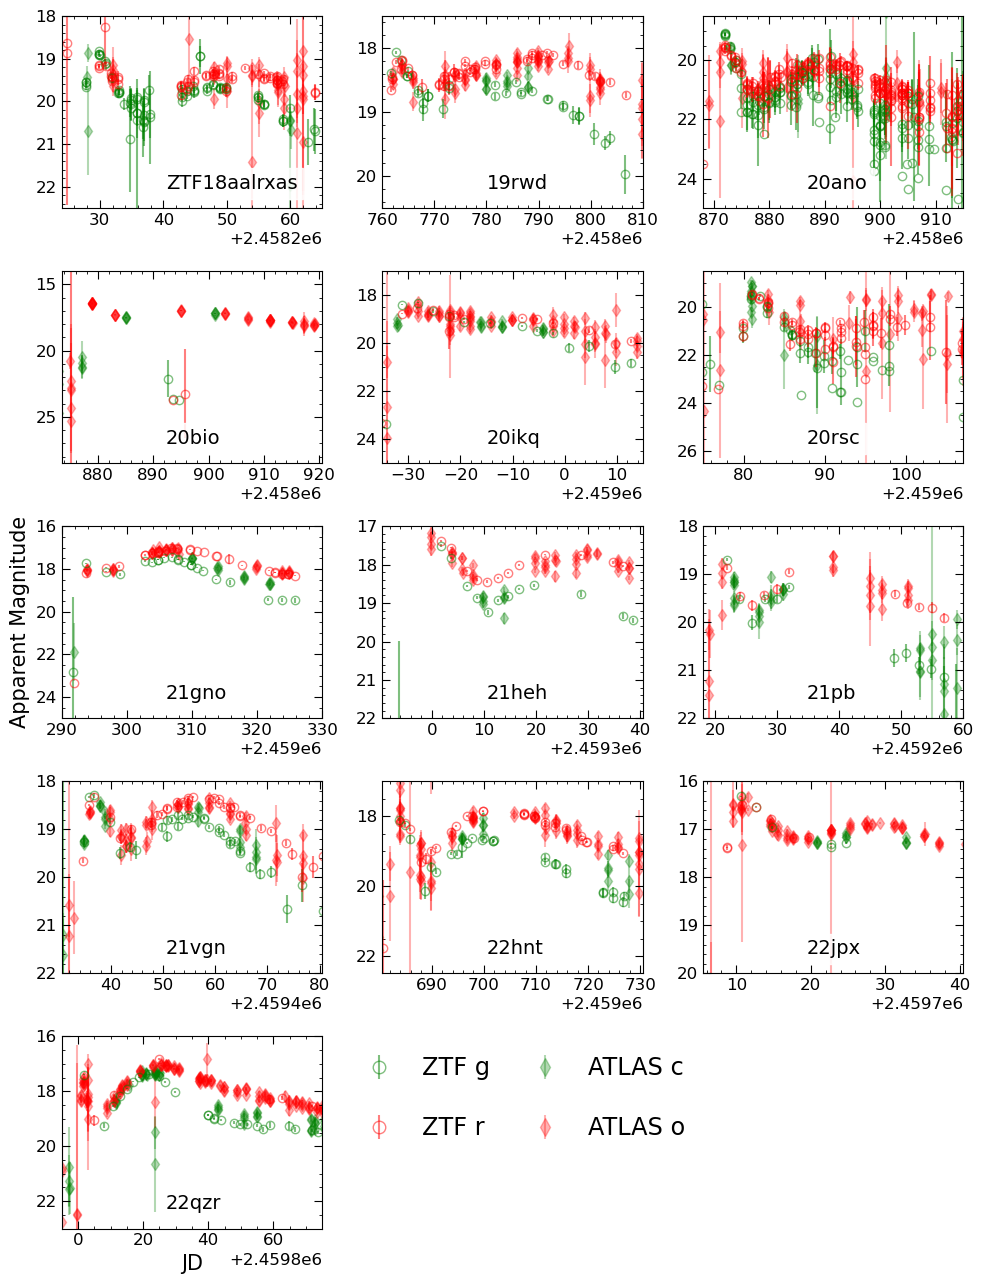

In [97]:
plot_names = ['ZTF18aalrxas', '19rwd', '20ano','20bio','20ikq','20rsc','21gno','21heh','21pb','21vgn','22hnt','22jpx','22qzr','','']
fig, axs = plt.subplots(5,3, figsize=(10,13))
locs = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2],[2,0],[2,1],[2,2],[3,0],[3,1],[3,2],[4,0],[4,1],[4,2]]

for i,df in enumerate(df_list):
    # get correct error band shape for plotting
    g_errs = shape_err(df, filter='ZTF_g', lower_err_col='ztf_mag_lower', upper_err_col='ztf_mag_upper')
    r_errs = shape_err(df, filter='ZTF_r', lower_err_col='ztf_mag_lower', upper_err_col='ztf_mag_upper')

    # plotting
    axs[locs[i][0],locs[i][1]].errorbar(df[df['filter']=='ZTF_g']['JD'], df[df['filter']=='ZTF_g']['mag'],g_errs,
                 markeredgecolor='green',markerfacecolor='none',ecolor='green',label='ZTF g',alpha=0.5,linestyle='',marker='o')
    axs[locs[i][0],locs[i][1]].errorbar(df[df['filter']=='ZTF_r']['JD'], df[df['filter']=='ZTF_r']['mag'],r_errs,
                 markeredgecolor='red',markerfacecolor='none',ecolor='red',label='ZTF r',alpha=0.5,linestyle='',marker='o')
    axs[locs[i][0],locs[i][1]].errorbar(df[df['filter']=='c']['JD'], df[df['filter']=='c']['mag'],df[df['filter']=='c']['atlas_mag_err'],
                 color='green', marker='d',label='ATLAS c',alpha=0.3,linestyle='',zorder=0)
    axs[locs[i][0],locs[i][1]].errorbar(df[df['filter']=='o']['JD'], df[df['filter']=='o']['mag'],df[df['filter']=='o']['atlas_mag_err'],
                 color='red', marker='d', label='ATLAS o',alpha=0.3,linestyle='',zorder=0)
    
    # setting plot limits
    axs[locs[i][0],locs[i][1]].set_xlim(xlims_jd_dict[df_str_list[i]][0],xlims_jd_dict[df_str_list[i]][1])
    axs[locs[i][0],locs[i][1]].set_ylim(ylims_dict[df_str_list[i]][0],ylims_dict[df_str_list[i]][1])

    #configuring tick markers and labels
    axs[locs[i][0],locs[i][1]].xaxis.set_minor_locator(AutoMinorLocator())
    axs[locs[i][0],locs[i][1]].yaxis.set_minor_locator(AutoMinorLocator())
    axs[locs[i][0],locs[i][1]].tick_params(which="both", top=True, labeltop=False, bottom=True, labelbottom=True, left=True, right=True, direction="in")
    axs[locs[i][0],locs[i][1]].xaxis.set_tick_params(length=6)
    axs[locs[i][0],locs[i][1]].yaxis.set_tick_params(length=6)
    bbox = dict(facecolor='white', edgecolor='white',alpha=0.85)
    axs[locs[i][0],locs[i][1]].annotate(plot_names[i],xy=(0.4,0.10),xycoords='axes fraction',color='k',fontsize=14,bbox=bbox)

axs[4,1].axis("off")
axs[4,2].axis("off")

# axs[4,0].set_xlabel('Normalized Time [days]')
axs[4,0].set_xlabel('JD', fontsize=15)
# axs[3,2].set_xlabel('Normalized Time [days]')

axs[2,0].set_ylabel('Apparent Magnitude', fontsize=15)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines[0:4], labels[0:4], loc='lower center', bbox_to_anchor=(0.528, 0.1), ncol=2, fontsize='x-large',markerscale=1.5,
                frameon=False,fancybox=False,framealpha=1.0,edgecolor='darkgray', labelspacing=1.5, columnspacing=1.3)
fig.tight_layout()
plt.savefig('./figures/full_individ_fp_lcs_subplot_unnorm.png',dpi=300)

In [17]:
##############################
#    RESIDUAL FIDDLING
##############################

In [18]:
sn19rwd_merge = fp_alert_merge(sn19rwd, sn19rwd_a)
sn21gno_merge = fp_alert_merge(sn21gno, sn21gno_a)
sn21heh_merge = fp_alert_merge(sn21heh, sn21heh_a)
sn21vgn_merge = fp_alert_merge(sn21vgn, sn21vgn_a)
sn22hnt_merge = fp_alert_merge(sn22hnt, sn22hnt_a)
sn22jpx_merge = fp_alert_merge(sn22jpx, sn22jpx_a)

In [19]:
compare_mags(sn19rwd_merge)
compare_mags(sn21gno_merge)
compare_mags(sn21heh_merge)
compare_mags(sn21vgn_merge)
compare_mags(sn22hnt_merge)
compare_mags(sn22jpx_merge)

In [20]:
alert_IDs = ['sn19rwd', 'sn21gno', 'sn21heh', 'sn21vgn', 'sn22hnt', 'sn22jpx']
merge_dfs = [sn19rwd_merge, sn21gno_merge, sn21heh_merge, sn21vgn_merge, sn22hnt_merge, sn22jpx_merge]

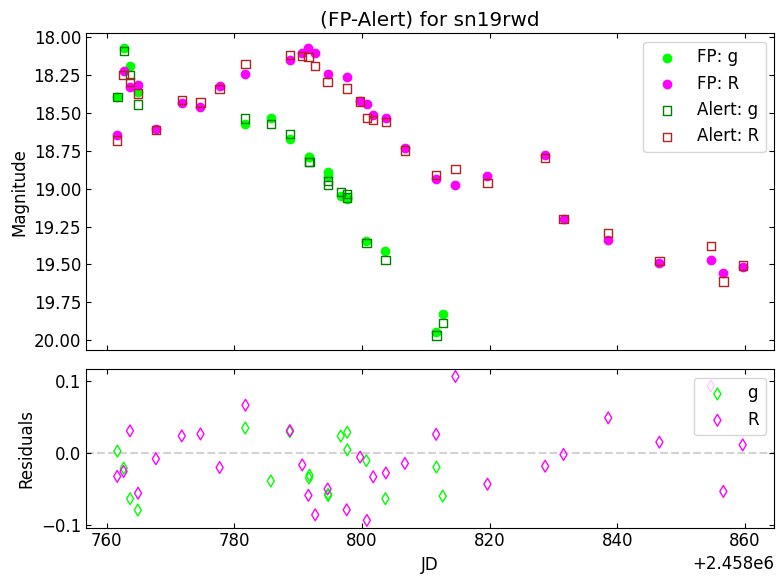

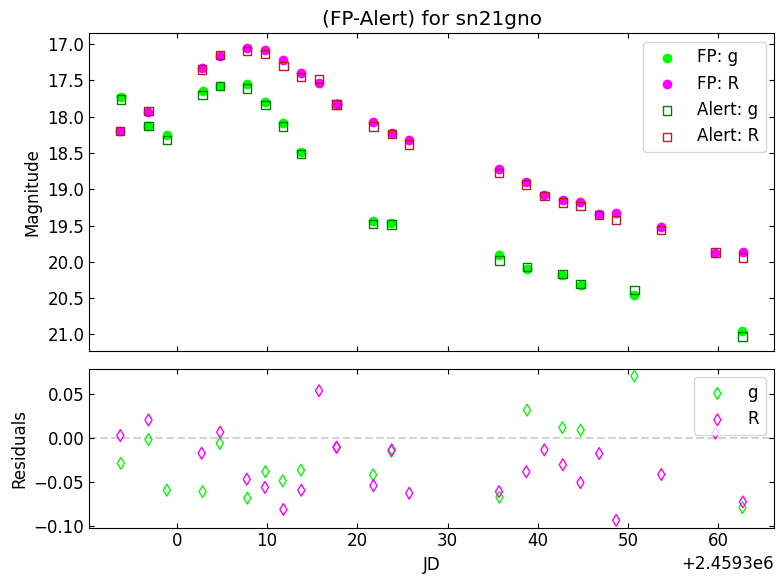

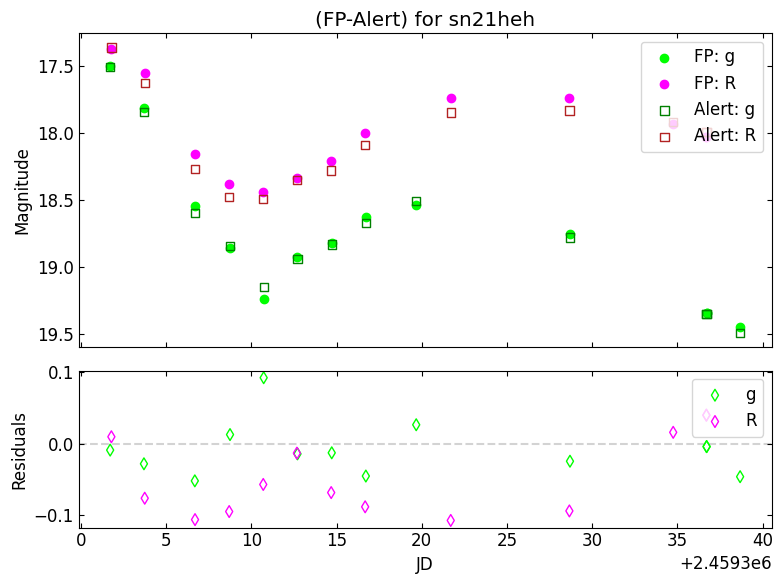

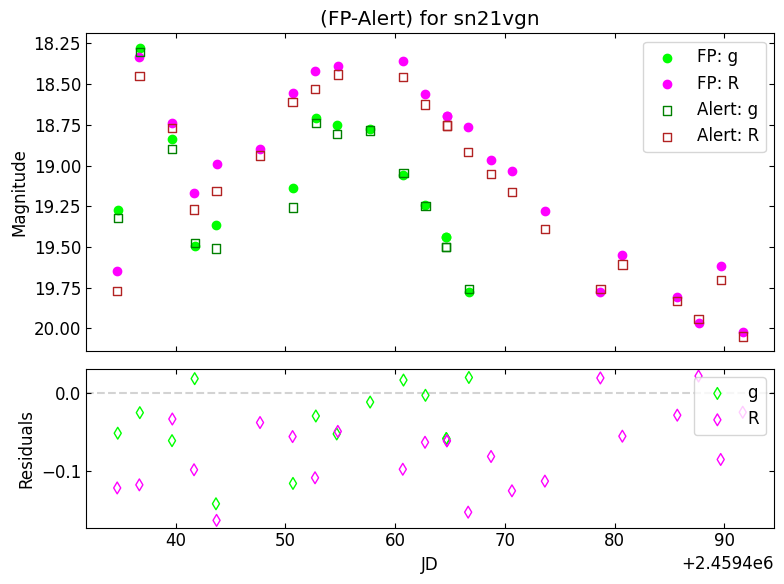

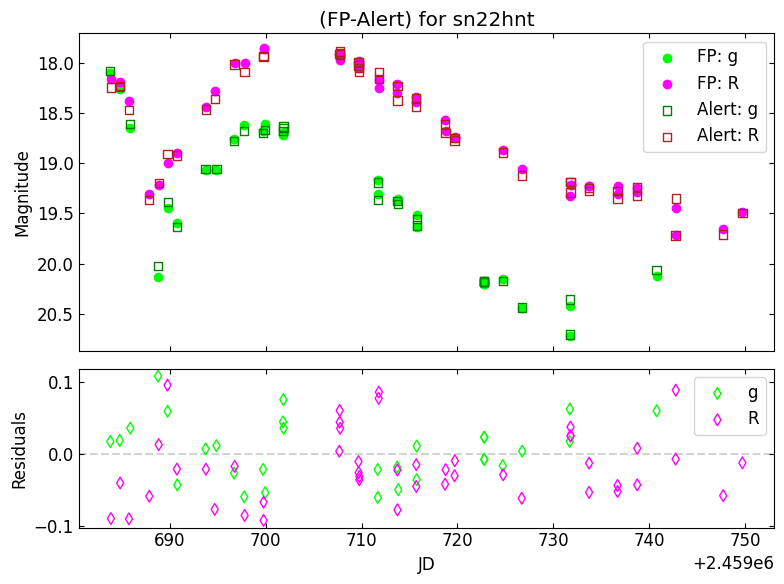

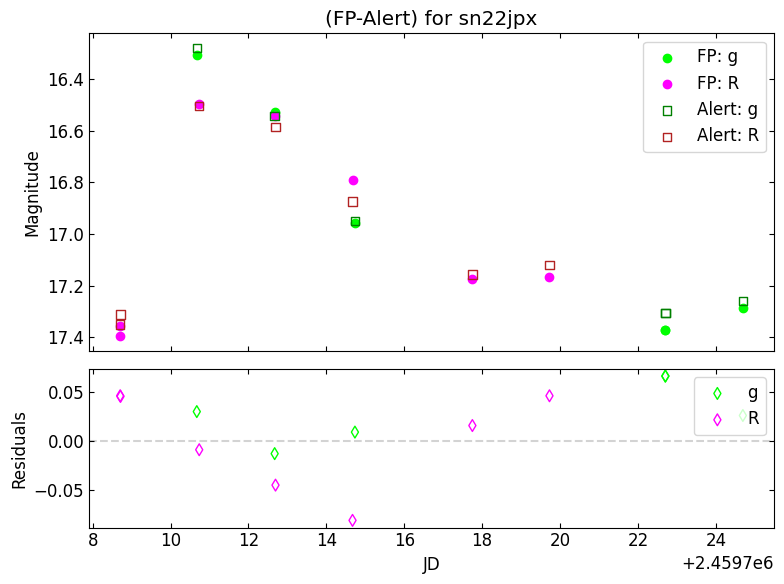

In [21]:
for i,df in enumerate(merge_dfs):
    plot_residuals(df, alert_IDs[i],save=False)

FileNotFoundError: [Errno 2] No such file or directory: './figures/fp/all_residuals.png'

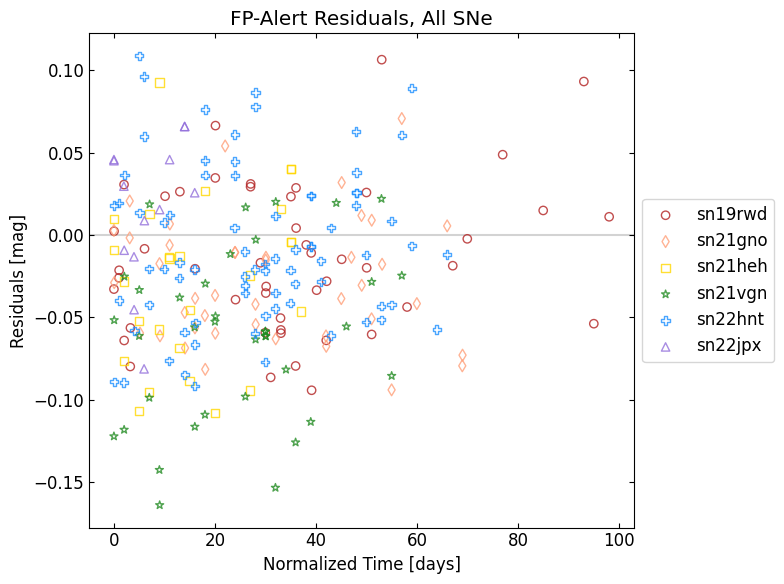

In [22]:
colors = ['firebrick', 'lightsalmon', 'gold', 'forestgreen', 'dodgerblue', 'mediumpurple']
markers = ['o', 'd', 's', '*', 'P', '^']

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)

for i,df in enumerate(merge_dfs):
    t_norm = normalize_time(df)

    plt.scatter(t_norm, df['mag_diff_fp-alert'], facecolor='none', edgecolor=colors[i], alpha=0.8, marker=markers[i], label=alert_IDs[i])
    plt.xlabel('Normalized Time [days]')
    plt.ylabel('Residuals [mag]')
    plt.title('FP-Alert Residuals, All SNe')

plt.axhline(0, color='lightgray', zorder=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels[0:15], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('./figures/fp/all_residuals.png')


In [ ]:
###########################
# single object reduction
###########################

/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/ql/0nrbq6jj6ks_2gbxfdznzzlc0000gp/T/ipykernel_68116/3719880940.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ztf_atlas_df['ztf_mag_lower'][ztf_atlas_df['data_origin']=='ztf'] = np.array(sn20sbw['mag_err_lower'])
/var/folders/ql/0nrbq6jj6ks_2gbxfdznzzlc0000gp/T/ipykernel_68116/3719880940.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ztf_atlas_df['ztf_mag_upper'][ztf_atlas_df['data_origin']=='ztf'] 

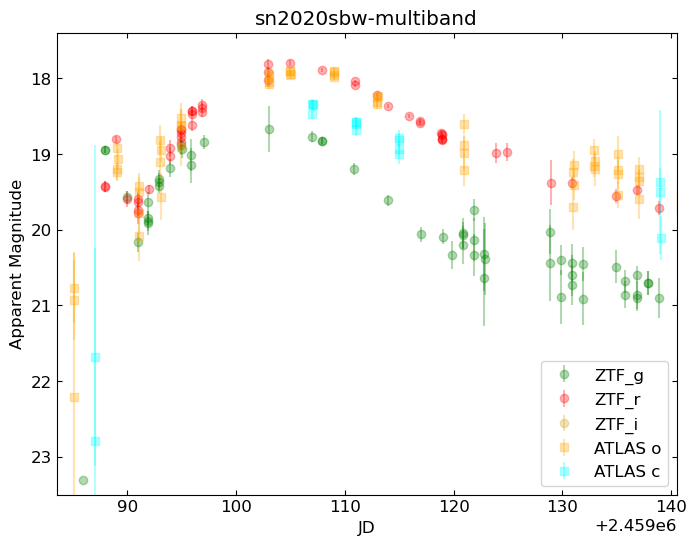

In [54]:
sn20sbw = read_in_data('./temp/sn20sbw_ztf_fp.txt', data_source='ztf_fp')
sn20sbw_at = read_in_data('./temp/sn20sbw_atlas.txt', data_source='atlas')
# plot_LC(sn21pb, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21pb', xlimit=True, xlims=[18+2.4592e6, 55+2.4592e6])
multi_band_plot(sn20sbw, _, sn20sbw_at, ID='sn2020sbw', xlims=[2459083.5, 2459140.5], ylims=[23.5,17.4],save=False, ztf=True, atlas=True, asassn=False)
#[2459083.5, 2459140.5]

fp_df = sn21pb
atlas_df = sn21pb_at

times = np.concatenate((np.array(sn20sbw['jd']),np.array(sn20sbw_at['JD'])),axis=None)
filters = np.concatenate((np.array(sn20sbw['filter']),np.array(sn20sbw_at['F'])),axis=None)
mags = np.concatenate((np.array(sn20sbw['mag']),np.array(sn20sbw_at['m'])),axis=None)
origins = np.concatenate((np.array(['ztf']*len(sn20sbw['jd'])),np.array(['atlas']*len(sn20sbw_at['JD']))),axis=None)

ztf_atlas_df = pd.DataFrame(columns=['JD', 'filter', 'mag', 'ztf_mag_lower', 'ztf_mag_upper', 'atlas_mag_err', 'data_origin'])

ztf_atlas_df['JD'],ztf_atlas_df['filter'],ztf_atlas_df['mag'],ztf_atlas_df['data_origin'] = times,filters,mags,origins
ztf_atlas_df['ztf_mag_lower'][ztf_atlas_df['data_origin']=='ztf'] = np.array(sn20sbw['mag_err_lower'])
ztf_atlas_df['ztf_mag_upper'][ztf_atlas_df['data_origin']=='ztf'] = np.array(sn20sbw['mag_err_upper'])
ztf_atlas_df['atlas_mag_err'][ztf_atlas_df['data_origin']=='atlas'] = np.array(atlas_df['dm'])

ztf_atlas_df

ztf_atlas_df.to_csv('./data/forced_phot_data/sn20sbw_ztf_atlas_df.csv',index_label='index')

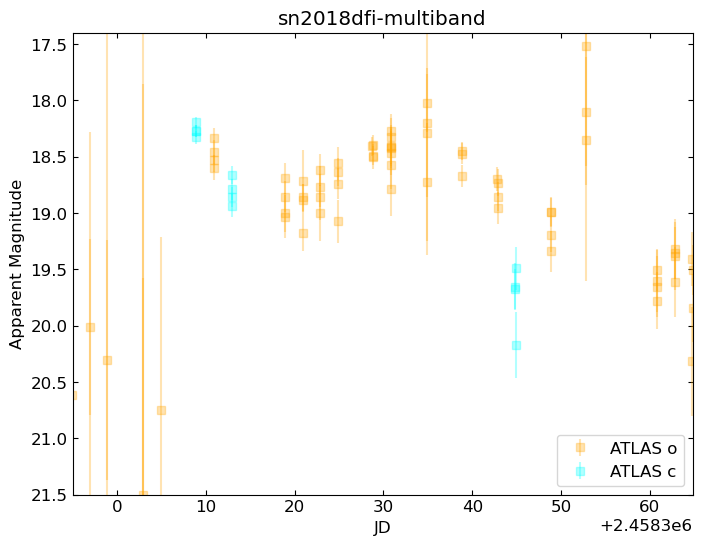

In [46]:
# sn18dfi = read_in_data('./temp/sn20sbw_ztf_fp.txt', data_source='ztf_fp')
sn18dfi_at = read_in_data('./temp/sn18dfi_atlas.txt', data_source='atlas')
# plot_LC(sn21pb, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21pb', xlimit=True, xlims=[18+2.4592e6, 55+2.4592e6])
multi_band_plot(_, _, sn18dfi_at, ID='sn2018dfi', xlims=[2458295.0, 2458364.79], ylims=[21.5,17.4],save=False, ztf=False, atlas=True, asassn=False)

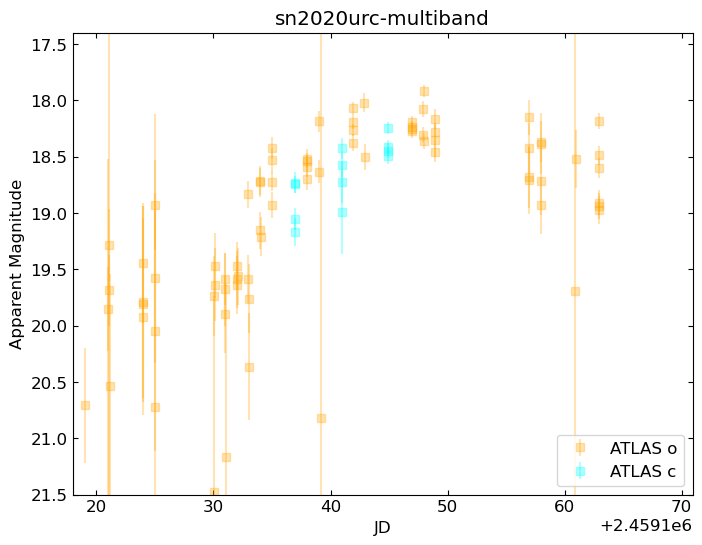

In [51]:
# sn20urc = read_in_data('./temp/sn20sbw_ztf_fp.txt', data_source='ztf_fp')
sn20urc_at = read_in_data('./temp/sn20urc_atlas.txt', data_source='atlas')
# plot_LC(sn21pb, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21pb', xlimit=True, xlims=[18+2.4592e6, 55+2.4592e6])
multi_band_plot(_, _, sn20urc_at, ID='sn2020urc', xlims=[2459117.96, 2459170.93], ylims=[21.5,17.4],save=False, ztf=False, atlas=True, asassn=False)